In [1]:
import os
import shutil
from IPython.display import Image

import rpy2.ipython


%load_ext rpy2.ipython

| Species            | Area | Location    | ENA Sample ID | SRA Accession | Source (Manucsript) |
| :----------------- | :--- | :---------- |-------------- | :------------ | :------------------ |
| *S. mansoni*       | EA   | Kenya       | ERS074980     | ERR119614     | Crellen et. al 2016 |
| *S. mansoni*       | EA   | Uganda-LA   | ERS074982     | ERR119615     | Crellen et. al 2016 |
| *S. mansoni*       | NW   | Puerto Rico | ERS039722     | ERR046038     | .                   |
| *S. mansoni*       | WA   | Senegal     | ERS074979     | ERR103049     | Crellen et. al 2016 |
| *S. mansoni*       | WA   | Cameroon    | ERS074981     | ERR103050     | Crellen et. al 2016 |
| *S. mansoni*       | EA   | Uganda-LV   | ERS141391     | ERR997461     | Crellen et. al 2016 |
| *S. mansoni*       | ?    | ?           | ?             | ERR539845     | .                   |
| *S. mansoni*       | NW   | Guadeloupe  | ERS427393     | ERR539846     | Crellen et. al 2016 |
| *S. mansoni*       | NW   | Guadeloupe  | ERS427392     | ERR539847     | Crellen et. al 2016 |
| *S. margrebowiei*  | ?    | ?           | ?             | ERX095893     | .                   |
| *S. margrebowiei*  | ?    | ?           | ?             | ERX284221     | .                   |
| *S. mansoni*       | NW   | Guadeloupe  | ERS427394     | ERR539848     | Crellen et. al 2016 |
| *S. rodhaini*      | RO   | Burundi     | ERS076741     | ERR310938     | Crellen et. al 2016 |
| *S. turkestanicum* | ?    | ?           | ERS139290     | ERX284225     | .                   |

Crellen *et al*. (2016) __Whole genome resequencing of the human parasite *Schistosoma mansoni* reveals population history and effects of selection__. [Scientific Reports 6:20954.](https://www.nature.com/articles/srep20954)

### Maps

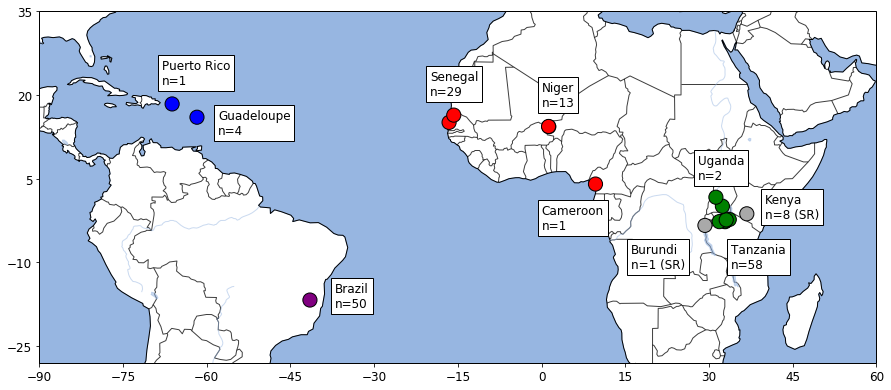

In [14]:
#make a clean dir
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
import numpy as np
import shutil


if os.path.isdir("results/maps"):
    shutil.rmtree("results/maps")
os.mkdir("results/maps")

pop_colors={}
pop_colors["eafrica"]   = "green"
pop_colors["wafrica"]   = "red"
pop_colors["brazil"]    = "purple"
pop_colors["caribbean"] = "blue"
pop_colors["rodhaini"]  = "darkgrey"

#get coordinates
# data/sampling_lat_lon.csv

# Country Location,Latitude,Longitude
# Senegal,Nder,15.083333,-16.566667
# Senegal,TemeyeS3,16.389444,-15.728889
# Niger,Diambala,14.31376,1.299648
# Niger,Namarigoungou,14.3554,1.2627
# Tanzania,Kigongo,-2.70955,32.89879
# Tanzania,Kabita,-2.31845,33.64372
# Tanzania,Nyamazugo,-2.55731,32.54214
# Tanzania,Katunguru,-2.50537937,32.67316932
# Tanzania,Luchelele,-2.61916,32.8733
# Tanzania,Nyandago,-2.69974,31.85495
# Tanzania,Sekagi,-2.39005,33.09819
# Brazil,Pontos dos Volantes,-16.752778,-41.503889
# Kenya, Nairobi, -1.3011869,36.7906464 
# Uganda,Lake Victoria, 0.0583665,32.4151119,13
# Uganda,Lake Alberta, 1.6738572,31.2493658
# Burundia,,-3.3751268,29.2853413
# Guadeloupe,,16.0102561,-61.7489572
# Puerto Rico,,18.389512,-66.2005625
# Cameroon,,4.036072,9.6717631


sample_sites = np.array([ [15.083333,   -16.566667],
                          [16.389444,   -15.728889],
                          [14.31376,    1.299648],
                          [14.3554,     1.2627],
                          [-2.70955,    32.89879],
                          [-2.31845,    33.64372],
                          [-2.55731,    32.54214],
                          [-2.50537937, 32.67316932],
                          [-2.61916,    32.8733],
                          [-2.69974,    31.85495],
                          [-2.39005,    33.09819],
                          [-16.752778,  -41.503889],
                          [-1.3011869,  36.7906464], 
                          [0.0583665,   32.4151119],
                          [1.6738572,   31.2493658],
                          [-3.3751268,  29.2853413],
                          [16.0102561,  -61.7489572],
                          [18.389512,   -66.2005625],
                          [4.036072,    9.6717631]    ])

lons, lats = sample_sites.T

   
site_colors = [pop_colors["wafrica"],   pop_colors["wafrica"],   pop_colors["wafrica"],  pop_colors["wafrica"], 
               pop_colors["eafrica"],   pop_colors["eafrica"],   pop_colors["eafrica"],  pop_colors["eafrica"], 
               pop_colors["eafrica"],   pop_colors["eafrica"],   pop_colors["eafrica"],  pop_colors["brazil"], 
               pop_colors["rodhaini"],  pop_colors["eafrica"],   pop_colors["eafrica"],  pop_colors["rodhaini"], 
               pop_colors["caribbean"], pop_colors["caribbean"], pop_colors["wafrica"] ] 

#set fig size
plt.figure(figsize=(15, 15))

#gen axes
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))

#draw land features
ax.add_feature(cartopy.feature.LAND, facecolor = "white")
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, alpha = 0.75)
ax.add_feature(cartopy.feature.LAKES, alpha = 0.5)
ax.add_feature(cartopy.feature.RIVERS, alpha = 0.5)

#set lat and long tick marks
lat_ticks = np.arange(-105, 80, 15)
lon_ticks = np.arange(-70,  70, 15)

ax.set_xticks(lat_ticks, crs = ccrs.PlateCarree())
ax.set_yticks(lon_ticks, crs = ccrs.PlateCarree())
plt.tick_params(labelsize = 12)

plt.text(-68, 22,  "Puerto Rico\nn=1",  bbox=dict(facecolor='white'), fontsize=12)
plt.text(-58, 13,  "Guadeloupe\nn=4",   bbox=dict(facecolor='white'), fontsize=12)
plt.text(-37, -18, "Brazil\nn=50",      bbox=dict(facecolor='white'), fontsize=12)
plt.text(-20, 20,  "Senegal\nn=29",     bbox=dict(facecolor='white'), fontsize=12)
plt.text(0,   18,  "Niger\nn=13",       bbox=dict(facecolor='white'), fontsize=12)
plt.text(0,   -4,  "Cameroon\nn=1",     bbox=dict(facecolor='white'), fontsize=12)
plt.text(34,  -11, "Tanzania\nn=58",    bbox=dict(facecolor='white'), fontsize=12)
plt.text(16,  -11, "Burundi\nn=1 (SR)", bbox=dict(facecolor='white'), fontsize=12)
plt.text(28,  5,   "Uganda\nn=2",       bbox=dict(facecolor='white'), fontsize=12)
plt.text(40,  -2,  "Kenya\nn=8 (SR)",   bbox=dict(facecolor='white'), fontsize=12)

#set limits of map
ax.set_extent([-90, 60, -28, 35], crs = ccrs.PlateCarree())

#plot sampling logations
plt.scatter(lats, lons,
            facecolors = site_colors, 
            edgecolors = 'black', 
            linewidth  = 1, 
            marker     = 'o', 
            s          = 200, 
            alpha      = 1,
            transform  = ccrs.PlateCarree(), 
            zorder     = 10 )

plt.savefig("results/maps/world_map.svg", format="svg")
plt.savefig("results/maps/world_map.png", format="png")

plt.show()


### Get data

In [ ]:
#make clean dir
if not os.path.isdir("data/sra"):
    os.mkdir("data/sra")

#download sra data for each sample
sra_accessions = [ "ERR119614", "ERR119615", "ERR046038",
                   "ERR103049", "ERR103050", "ERR997461", 
                   "ERR539845", "ERR539846", "ERR539847"              
                   "ERX095893", "ERX284221", "ERR539848",
                   "ERR310938", "ERX284225"   ]

for accession in sra_accessions:
    !fastq-dump --split-files --gzip --outdir data/seq_data/wg_sra/ {accession}

In [ ]:
#get exome data (soon to be in the sra)

In [ ]:
#get smansoni v7 genome and annotations

### Genotyping

In [ ]:
%%bash

#run snakemake
snakemake \
    --printshellcmds \
    --use-conda \
    --cluster 'qsub -V -cwd -S /bin/bash -pe smp {threads} -o {log}.log -j y' \
    --jobs 1000 \
    --latency-wait 200 \
    --keep-going

### Filtering

Multiple rounds of filtering were used to get rid of low quality sites and poorly genotyped sites/individuals

First low quality/coverage were removed and only bi-allelic sites were retained

In [9]:
%%bash

vcftools \
    --vcf results/variant_filtration/hard_filtered.vcf \
    --minDP 12 \
    --minGQ 25 \
    --min-alleles 2 \
    --max-alleles 2 \
    --recode \
    --recode-INFO-all \
    --stdout \
    >results/variant_filtration/gq_dp.vcf


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf results/variant_filtration/hard_filtered.vcf
	--recode-INFO-all
	--max-alleles 2
	--min-alleles 2
	--minDP 12
	--minGQ 25
	--recode
	--stdout

After filtering, kept 172 out of 172 Individuals
Outputting VCF file...
After filtering, kept 671303 out of a possible 703368 Sites
Run Time = 1100.00 seconds


sites that were genotyped less than 50% of the time were removed

In [14]:
%%bash

#find sites with gt50% missing data
vcftools \
    --vcf results/variant_filtration/gq_dp.vcf \
    --missing-site \
    --stdout \
    >results/variant_filtration/gt_rate_per_site.tbl

awk '{if ($6<0.5) print $1"\t"$2}' \
    results/variant_filtration/gt_rate_per_site.tbl \
    >results/variant_filtration/gt_rate_ge_50p.list

vcftools \
    --vcf results/variant_filtration/gq_dp.vcf \
    --positions results/variant_filtration/gt_rate_ge_50p.list \
    --recode \
    --recode-INFO-all \
    --stdout \
    >results/variant_filtration/gt_rate_ge_50p.vcf


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf results/variant_filtration/gq_dp.vcf
	--recode-INFO-all
	--positions results/variant_filtration/gt_rate_ge_50p.list
	--recode
	--stdout

After filtering, kept 172 out of 172 Individuals
Outputting VCF file...
After filtering, kept 631588 out of a possible 671303 Sites
Run Time = 857.00 seconds


individuals there were genotyped at less than 50% of sites were removed

In [15]:
%%bash

#find idivs with lt 50p data
vcftools \
    --vcf results/variant_filtration/gt_rate_ge_50p.vcf \
    --missing-indv \
    --stdout \
    >results/variant_filtration/indiv_gt_rate.tbl

cat results/variant_filtration/indiv_gt_rate.tbl \
    | awk '$5>0.50 {print $1}' \
    | sed 1d \
    >results/variant_filtration/indiv_gt_rate_lt_50p.list

vcftools \
    --vcf results/variant_filtration/gt_rate_ge_50p.vcf \
    --remove results/variant_filtration/indiv_gt_rate_lt_50p.list \
    --recode \
    --recode-INFO-all \
    --stdout \
    >results/variant_filtration/50p_site_50p_indiv_filtered.vcf


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf results/variant_filtration/gt_rate_ge_50p.vcf
	--missing-indv
	--stdout

After filtering, kept 172 out of 172 Individuals
Outputting Individual Missingness
After filtering, kept 631588 out of a possible 631588 Sites
Run Time = 180.00 seconds

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf results/variant_filtration/gt_rate_ge_50p.vcf
	--remove results/variant_filtration/indiv_gt_rate_lt_50p.list
	--recode-INFO-all
	--recode
	--stdout

Excluding individuals in 'exclude' list
After filtering, kept 156 out of 172 Individuals
Outputting VCF file...
After filtering, kept 631588 out of a possible 631588 Sites
Run Time = 834.00 seconds


added an id to each site (chrom:pos)

In [16]:
%%bash

bcftools annotate \
    --set-id +'%CHROM\:%POS' \
    results/variant_filtration/50p_site_50p_indiv_filtered.vcf \
    >results/variant_filtration/50p_site_50p_indiv_filtered_annotated.vcf

to make processing easier, i reorganized the order of individuals in "geographic" order rather than alphabetical order of sample names (the ```re-organized_header.vcf``` file was manually generated)

In [17]:
%%bash

grep "#" results/variant_filtration/50p_site_50p_indiv_filtered_annotated.vcf >results/variant_filtration/header.vcf

In [18]:
%%bash

#manually re-arrange samples into desired order and save as results/variant_filtration/re-organized_header.vcf
gzip results/variant_filtration/50p_site_50p_indiv_filtered_annotated.vcf
gzip results/variant_filtration/re-organized_header.vcf

vcf-shuffle-cols -t results/variant_filtration/re-organized_header.vcf.gz \
    results/variant_filtration/50p_site_50p_indiv_filtered_annotated.vcf.gz \
    >results/variant_filtration/smv7_ex_snps.vcf

In [ ]:
%%bash

#get gt rate of final filtered dataset
vcftools \
    --vcf results/variant_filtration/smv7_ex_snps.vcf \
    --missing-indv \
    --stdout \
    >results/variant_filtration/gt_rate_per_indiv_at_filtered_sites.tbl
    
vcftools \
    --vcf results/variant_filtration/smv7_ex_snps.vcf \
    --missing-site \
    --stdout \
    >results/variant_filtration/gt_rate_per_site_at_filtered_sites.tbl

split the filtered file into autosomal, sex_chr, and mitochondrial variants

In [23]:
%%bash

vcftools \
    --vcf results/variant_filtration/smv7_ex_snps.vcf \
    --chr SM_V7_1 \
    --chr SM_V7_2 \
    --chr SM_V7_3 \
    --chr SM_V7_4 \
    --chr SM_V7_5 \
    --chr SM_V7_6 \
    --chr SM_V7_7 \
    --recode \
    --recode-INFO-all \
    --stdout \
    >results/variant_filtration/smv7_ex_autosomes.vcf
    
vcftools \
    --vcf results/variant_filtration/smv7_ex_snps.vcf \
    --chr SM_V7_ZW \
    --recode \
    --recode-INFO-all \
    --stdout \
    >results/variant_filtration/smv7_ex_zw.vcf
    
vcftools \
    --vcf results/variant_filtration/smv7_ex_snps.vcf \
    --chr SM_V7_MITO \
    --recode \
    --recode-INFO-all \
    --stdout \
    >results/variant_filtration/smv7_ex_mito.vcf
    
vcftools \
    --vcf results/variant_filtration/smv7_ex_snps.vcf \
    --not-chr SM_V7_1 \
    --not-chr SM_V7_2 \
    --not-chr SM_V7_3 \
    --not-chr SM_V7_4 \
    --not-chr SM_V7_5 \
    --not-chr SM_V7_6 \
    --not-chr SM_V7_7 \
    --not-chr SM_V7_MITO \
    --not-chr SM_V7_ZW \
    --recode \
    --recode-INFO-all \
    --stdout \
    >results/variant_filtration/smv7_ex_other.vcf


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf results/variant_filtration/smv7_ex_snps.vcf
	--chr SM_V7_1
	--chr SM_V7_2
	--chr SM_V7_3
	--chr SM_V7_4
	--chr SM_V7_5
	--chr SM_V7_6
	--chr SM_V7_7
	--recode-INFO-all
	--recode
	--stdout

After filtering, kept 156 out of 156 Individuals
Outputting VCF file...
After filtering, kept 475081 out of a possible 631588 Sites
Run Time = 657.00 seconds

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf results/variant_filtration/smv7_ex_snps.vcf
	--chr SM_V7_ZW
	--recode-INFO-all
	--recode
	--stdout

After filtering, kept 156 out of 156 Individuals
Outputting VCF file...
After filtering, kept 155410 out of a possible 631588 Sites
Run Time = 205.00 seconds

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf results/variant_filtration/smv7_ex_snps.vcf
	--chr SM_V7_MITO
	--recode-INFO-all
	--recode
	--stdout

After

filter sites based on ld

In [24]:
%%bash

#find SNPs in LD
plink \
    --vcf results/variant_filtration/smv7_ex_autosomes.vcf \
    --double-id \
    --allow-extra-chr \
    --indep-pairwise 250kb 1 0.20 \
    --out results/variant_filtration/smv7_ex_autosomes_ld

#extract SNPs in LD
vcftools \
    --vcf results/variant_filtration/smv7_ex_autosomes.vcf \
    --exclude results/variant_filtration/smv7_ex_autosomes_ld.prune.out \
    --recode \
    --recode-INFO-all \
    --stdout \
    >results/variant_filtration/smv7_ex_autosomes_ld.vcf

PLINK v1.90b4 64-bit (20 Mar 2017)             www.cog-genomics.org/plink/1.9/
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to results/variant_filtration/smv7_ex_autosomes_ld.log.
Options in effect:
  --allow-extra-chr
  --double-id
  --indep-pairwise 250kb 1 0.20
  --out results/variant_filtration/smv7_ex_autosomes_ld
  --vcf results/variant_filtration/smv7_ex_autosomes.vcf

24158 MB RAM detected; reserving 12079 MB for main workspace.
--vcf: results/variant_filtration/smv7_ex_autosomes_ld-temporary.bed +
results/variant_filtration/smv7_ex_autosomes_ld-temporary.bim +
results/variant_filtration/smv7_ex_autosomes_ld-temporary.fam written.
475081 variants loaded from .bim file.
156 people (0 males, 0 females, 156 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
results/variant_filtration/smv7_ex_autosomes_ld.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 156 founders and 0 nonfounders presen


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf results/variant_filtration/smv7_ex_autosomes.vcf
	--recode-INFO-all
	--recode
	--exclude results/variant_filtration/smv7_ex_autosomes_ld.prune.out
	--stdout

After filtering, kept 156 out of 156 Individuals
Outputting VCF file...
After filtering, kept 38197 out of a possible 475081 Sites
Run Time = 43.00 seconds


#### unused

In [ ]:
# %%bash 

# #this will get common alleles in each population
# for POP in east_africa west_africa new_world rodhaini; do
   
#    vcftools \
#         --vcf results/variant_filtration/smv7_ex_autosomes.vcf \
#         --keep results/lists/$POP.list \
#         --maf 0.05 \
#         --recode \
#         --recode-INFO-all \
#         --stdout \
#         >results/variant_filtration/smv7_ex_autosomes_"$POP"_maf05.vcf
# done

# #this will get common alleles in the entire dataset (in particular this targets
# #  high frequency/fixed alleles in rodhaini that aren't present in mansoni
# vcftools \
#     --vcf results/variant_filtration/smv7_ex_autosomes.vcf \
#     --keep results/lists/$POP.list \
#     --maf 0.05 \
#     --recode \
#     --recode-INFO-all \
#     --stdout \
#     >results/variant_filtration/smv7_ex_autosomes_all_maf05.vcf
        

In [ ]:
# import re
# import os
# import numpy as np

# #open in/out files
# vcf_infile  = open("results/variant_filtration/smv7_ex_autosomes.vcf", 'r')
# snp_outfile = open("results/variant_filtration/rodhaini_variants.list", 'w')



# for entry in vcf_infile:
    
#     #ignore the headers
#     if entry.find("#") != 0:
        
#         #declare list to store genotypes in (and empty it)        
#         gts=[]
#         #get the genotype info for all samples
#         chr, pos, id, ref, alt, qual, filter, site_info, fields, *gt_data = entry.split("\t")
    
#         #extract the genotypes        
#         for gt_datum in gt_data:
#             gt=re.split('\/|\|', gt_datum.split(":")[0])
#             gts.append(gt)
        
#         #for each species
#         rod_gts = np.array(gts[1:10])
#         man_gts = np.array(gts[10:156])
       
#         #count the ref and alt alleles as well as missing data
#         rod={}
#         for allele in "0", "1", ".":
#             rod[allele] = np.count_nonzero(rod_gts == allele)
           
#         man={}
#         for allele in "0", "1", ".":
#             man[allele] = np.count_nonzero(man_gts == allele)

#         #get allele frequencies
#         rod_gtd=rod["0"] + rod["1"]
#         if(rod_gtd > 0):
#             rod_ref_freq = rod["0"] / rod_gtd
#             rod_alt_freq = rod["1"] / rod_gtd

#             man_gtd=man["0"] + man["1"]
#             man_ref_freq = man["0"] / man_gtd
#             man_alt_freq = man["1"] / man_gtd

#             #snp_outfile.write(id + "," + rod_ref_freq + "," + rod_alt_freq + "," + man_ref_freq + "," + man_alt_freq + "\n")
#             #here we capture ANY variation in rodent allele freqs
#             if rod_alt_freq < 1 and rod_alt_freq > 0:
#                 snp_outfile.write(id + "\n")
#             #here we look for private alleles in man v rod (private)
#             elif rod_alt_freq == 1 and man_alt_freq != 1:
#                 snp_outfile.write(id + "\n")
#             elif rod_ref_freq == 1 and man_ref_freq != 0:
#                 snp_outfile.write(id + "\n")

# vcf_infile.close()
# snp_outfile.close()

In [28]:
# %%bash

# cat results/variant_filtration/smv7_ex_autsomes_*_maf05.vcf \
#     | grep -v "#" \
#     | cut -f3 \
#     | sort \
#     | uniq \
#     >results/variant_filtration/common_snps_to_keep.list
    
# cat results/variant_filtration/common_snps_to_keep.list \
#     results/variant_filtration/rodhaini_variants.list \
#     | sort \
#     | uniq \
#     >results/variant_filtration/target_snps_to_keep.list
    
# vcftools \
#     --vcf results/variant_filtration/smv7_ex_autsomes.vcf \
#     --snps results/variant_filtration/target_snps_to_keep.list \
#     --recode \
#     --recode-INFO-all \
#     --stdout \
#     >results/variant_filtration/smv7_ex_autosomes_maf05.vcf


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf results/variant_filtration/smv7_ex_autosomes.vcf
	--keep results/lists/east_africa.list
	--recode-INFO-all
	--maf 0.05
	--recode
	--stdout

Keeping individuals in 'keep' list
After filtering, kept 58 out of 156 Individuals
Outputting VCF file...
After filtering, kept 43827 out of a possible 476038 Sites
Run Time = 52.00 seconds

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf results/variant_filtration/smv7_ex_autosomes.vcf
	--keep results/lists/west_africa.list
	--recode-INFO-all
	--maf 0.05
	--recode
	--stdout

Keeping individuals in 'keep' list
After filtering, kept 37 out of 156 Individuals
Outputting VCF file...
After filtering, kept 16565 out of a possible 476038 Sites
Run Time = 44.00 seconds

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf results/variant_filtration/smv7_ex_autosomes.vcf
	--

### read counts and probe coverages

In [ ]:
%%bash

#make directory
if [ -d results/probe_coverage_and_read_counts/ ]; then
    rm -r  results/probe_coverage_and_read_counts
fi

mkdir -p results/probe_coverage_and_read_counts/mosdepth
mkdir -p results/probe_coverage_and_read_counts/flagstat


echo -e "SAMPLE,NUM_RAW_READS,NUM_FILTERED_READS,NUM_MAPPED_READS,AVG_COV_PER_PROBE,NUM_PROBES_LT_12X_COV,NUM_PROBES_W_0X_COV,MISSING_ALL_SITES,MISSING_FILT_SITES" \
    >results/probe_coverage_and_read_counts/stats.csv

for R1_FQ in $(ls data/exomes/*1.fastq.gz data/sra/*1.fastq.gz); do
    SAMPLE=$(basename $R1_FQ _R1.fastq.gz)
    
    #NUM_RAW_READS  
    R2_FQ=data/exomes/"$SAMPLE"_R2.fastq.gz 
 
    NUM_RAW_LINES=$(zcat $R1_FQ $R2_FQ| wc -l)
    NUM_RAW_READS=$(( $NUM_RAW_LINES / 4 ))

    #NUM_FILTERED_READS
    FILT_R1=results/filtered_reads/"$SAMPLE"_filtered_R1.fastq.gz 
    FILT_R2=results/filtered_reads/"$SAMPLE"_filtered_R2.fastq.gz 


    NUM_FILT_LINES=$(zcat $FILT_R1 $FILT_R2| wc -l)
    NUM_FILT_READS=$(( $NUM_FILT_LINES / 4 ))
   
    #NUM_MAPPED_READS
    BAM_FILE=results/mapped_reads/"$SAMPLE"_processed.bam
    FLAG_FILE=results/probe_coverage_and_read_counts/flagstat/"$SAMPLE"_processed.bam.flagstat
    
    samtools flagstat $BAM_FILE >$FLAG_FILE
    NUM_MAPPED_READS=$(grep mapped $FLAG_FILE | cut -f1 -d" " | head -n 1)

    #COVERAGE
    mosdepth \
        -t 10 \
        --by data/renamed-sma_agilent_baits.v7.0.chr_reorderd.bed  \
        results/probe_coverage_and_read_counts/mosdepth/$SAMPLE \
        --no-per-base \
        $BAM_FILE

    MOSDEPTH_BED=results/probe_coverage_and_read_counts/mosdepth/$SAMPLE.regions.bed.gz

    AVG_COV=$(zcat $MOSDEPTH_BED  | awk '{sum += $4} END {print sum/NR}')
    LT12_COV=$(zcat $MOSDEPTH_BED | awk '{if ($4<12) print $0}' | wc -l)
    NO_COV=$(zcat $MOSDEPTH_BED   | awk '{if ($4==0) print $0}' | wc -l)

    #gt rate at all gtd sites
    MISSING_ALL=$(grep $SAMPLE results/variant_filtration/indiv_gt_rate.tbl | cut -f5)


    #gt rate at filtered sites
    MISSING_FILT=$(grep $SAMPLE results/variant_filtration/gt_rate_per_indiv_at_filtered_sites.tbl | cut -f5)
    
    #print to file
    echo "$SAMPLE,$NUM_RAW_READS,$NUM_FILT_READS,$NUM_MAPPED_READS,$AVG_COV,$LT12_COV,$NO_COV,$MISSING_ALL,$MISSING_FILT" >>results/probe_coverage_and_read_counts/stats.csv
    echo -e "$SAMPLE\t$NUM_RAW_READS\t$NUM_FILT_READS\t$NUM_MAPPED_READS\t$AVG_COV\t$LT12_COV\t$NO_COV\t$MISSING_ALL\t$MISSING_FILT"
done


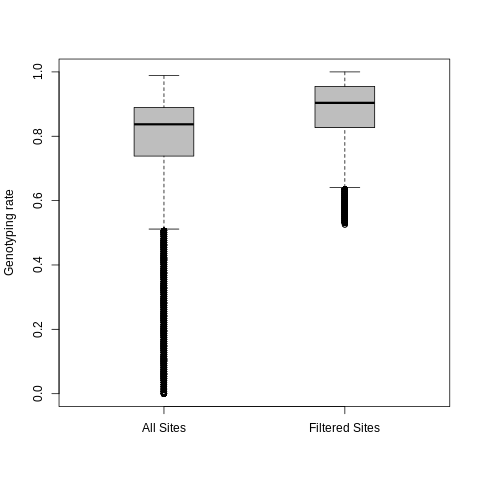

In [114]:
%%R

#gt_rate_all_sites_tbl<-read.table("results/variant_filtration/gt_rate_per_site.tbl", header=TRUE)
#gt_rate_flt_sites_tbl<-read.table("results/variant_filtration/gt_rate_per_site_at_filtered_sites.tbl", header=TRUE)

#head(gt_rate_flt_sites_tbl)

boxplot(1-gt_rate_all_sites_tbl$F_MISS, 
        1-gt_rate_flt_sites_tbl$F_MISS,
        notch=FALSE,
        ylab="Genotyping rate",
        col=c("grey", "grey"),
        names=c("All Sites", "Filtered Sites"),
        boxwex=0.33
       )



#hist(1-gt_rate_flt_sites_tbl$F_MISS)

### read in vcf

In [ ]:
chroms = ['SM_V7_1', 'SM_V7_2', 'SM_V7_3', 'SM_V7_4',
          'SM_V7_5', 'SM_V7_6', 'SM_V7_7', 'SM_V7_ZW']

with open('data/genomes/Smansoni_v7.fa.fai','r') as sm_fai:
    sm_chroms = [line.strip().split('\t')[0] for line in sm_fai]
#order list of sample ids

In [157]:
import os
from os import path

population_assignments = {
    "ERX284221"               : "margrebowiei",
    "ERR310938"               : "rodhaini",
    "Sro_female_1.1_CCATCCTC" : "rodhaini",
    "Sro_female_1.2_CCGACAAC" : "rodhaini",
    "Sro_female_2.1_CCTAATCC" : "rodhaini",
    "Sro_female_2.2_CCTCTATC" : "rodhaini",
    "Sro_male_1.1_ATCATTCC"   : "rodhaini",
    "Sro_male_1.2_ATTGGCTC"   : "rodhaini",
    "Sro_male_2.1_CAAGGAGC"   : "rodhaini",
    "Sro_male_2.2_CACCTTAC"   : "rodhaini",
    "ERR046038"               : "new_world",
    "ERR539847"               : "new_world",
    "ERR539848"               : "new_world",
    "Sm.BR_PdV.0447.1"        : "new_world",
    "Sm.BR_PdV.1039.1"        : "new_world",
    "Sm.BR_PdV.1079.1"        : "new_world",
    "Sm.BR_PdV.1094.1"        : "new_world",
    "Sm.BR_PdV.1103.1"        : "new_world",
    "Sm.BR_PdV.1127.1"        : "new_world",
    "Sm.BR_PdV.1278.1"        : "new_world",
    "Sm.BR_PdV.1340.1"        : "new_world",
    "Sm.BR_PdV.1340.2"        : "new_world",
    "Sm.BR_PdV.1371.1"        : "new_world",
    "Sm.BR_PdV.1404.1"        : "new_world",
    "Sm.BR_PdV.1409.1"        : "new_world",
    "Sm.BR_PdV.1409_rep"      : "new_world",
    "Sm.BR_PdV.1418.1"        : "new_world",
    "Sm.BR_PdV.1475.1"        : "new_world",
    "Sm.BR_PdV.1475_rep"      : "new_world",
    "Sm.BR_PdV.1489.1"        : "new_world",
    "Sm.BR_PdV.2039.1"        : "new_world",
    "Sm.BR_PdV.2039.2"        : "new_world",
    "Sm.BR_PdV.2072.1"        : "new_world",
    "Sm.BR_PdV.2074.1"        : "new_world",
    "Sm.BR_PdV.2076.1"        : "new_world",
    "Sm.BR_PdV.2133.1"        : "new_world",
    "Sm.BR_PdV.2147.1"        : "new_world",
    "Sm.BR_PdV.2189.1"        : "new_world",
    "Sm.BR_PdV.2196.2"        : "new_world",
    "Sm.BR_PdV.2225.1"        : "new_world",
    "Sm.BR_PdV.2227.1"        : "new_world",
    "Sm.BR_PdV.2265.1"        : "new_world",
    "Sm.BR_PdV.2290.1"        : "new_world",
    "Sm.BR_PdV.2300.1"        : "new_world",
    "Sm.BR_PdV.2334.1"        : "new_world",
    "Sm.BR_PdV.2368.1"        : "new_world",
    "Sm.BR_PdV.2406.1"        : "new_world",
    "Sm.BR_PdV.2406_rep"      : "new_world",
    "Sm.BR_PdV.2422.1"        : "new_world",
    "Sm.BR_PdV.2450.1"        : "new_world",
    "Sm.BR_PdV.2456.1"        : "new_world",
    "Sm.BR_PdV.2481.1"        : "new_world",
    "Sm.BR_PdV.2489.1"        : "new_world",
    "Sm.BR_PdV.2508.1"        : "new_world",
    "Sm.BR_PdV.2516.2"        : "new_world",
    "Sm.BR_PdV.2530.1"        : "new_world",
    "Sm.BR_PdV.2538.1"        : "new_world",
    "Sm.BR_PdV.2546.1"        : "new_world",
    "Sm.BR_PdV.2556.1"        : "new_world",
    "Sm.BR_PdV.2577.1"        : "new_world",
    "Sm.BR_PdV.4293.2"        : "new_world",
    "ERR103050"               : "west_africa",
    "Sm.NE_Di158.1"           : "west_africa",
    "Sm.NE_Di186.1"           : "west_africa",
    "Sm.NE_Di238.1"           : "west_africa",
    "Sm.NE_Di297.1"           : "west_africa",
    "Sm.NE_Di297.2"           : "west_africa",
    "Sm.NE_Di68.2"            : "west_africa",
    "Sm.NE_Na376.2"           : "west_africa",
    "Sm.NE_Na381.1"           : "west_africa",
    "Sm.NE_Na39.1"            : "west_africa",
    "Sm.NE_Na40.1"            : "west_africa",
    "ERR103049"               : "west_africa",
    "Sm.SN_Nd103.1"           : "west_africa",
    "Sm.SN_Nd109.1"           : "west_africa",
    "Sm.SN_Nd114.1"           : "west_africa",
    "Sm.SN_Nd115.1"           : "west_africa",
    "Sm.SN_Nd18.1"            : "west_africa",
    "Sm.SN_Nd22.1"            : "west_africa",
    "Sm.SN_Nd24.1"            : "west_africa",
    "Sm.SN_Nd25.1"            : "west_africa",
    "Sm.SN_Nd34.1"            : "west_africa",
    "Sm.SN_Nd43.1"            : "west_africa",
    "Sm.SN_Nd47.1"            : "west_africa",
    "Sm.SN_Nd5.1"             : "west_africa",
    "Sm.SN_Nd5.2"             : "west_africa",
    "Sm.SN_Nd50.1"            : "west_africa",
    "Sm.SN_Nd54.1"            : "west_africa",
    "Sm.SN_Nd56.1"            : "west_africa",
    "Sm.SN_Nd77.1"            : "west_africa",
    "Sm.SN_Nd79.1"            : "west_africa",
    "Sm.SN_Nd9.1"             : "west_africa",
    "Sm.SN_Nd90.1"            : "west_africa",
    "Sm.SN_Te26.1"            : "west_africa",
    "Sm.SN_Te3.1"             : "west_africa",
    "Sm.SN_Te49.1"            : "west_africa",
    "Sm.SN_Te55.1"            : "west_africa",
    "Sm.SN_Te68.1"            : "west_africa",
    "ERR119614"               : "east_africa",
    "ERR119615"               : "east_africa",
    "ERR997461"               : "east_africa",
    "Sm.TZ_009.1.1"           : "east_africa",
    "Sm.TZ_009.10.1"          : "east_africa",
    "Sm.TZ_009.2.2"           : "east_africa",
    "Sm.TZ_009.3.1"           : "east_africa",
    "Sm.TZ_009.4.2"           : "east_africa",
    "Sm.TZ_009.5.2"           : "east_africa",
    "Sm.TZ_009.6.1"           : "east_africa",
    "Sm.TZ_009.7.1"           : "east_africa",
    "Sm.TZ_009.8.2"           : "east_africa",
    "Sm.TZ_009.9.1"           : "east_africa",
    "Sm.TZ_055.1.3"           : "east_africa",
    "Sm.TZ_055.10.1"          : "east_africa",
    "Sm.TZ_055.2.1"           : "east_africa",
    "Sm.TZ_055.3.2"           : "east_africa",
    "Sm.TZ_055.5.1"           : "east_africa",
    "Sm.TZ_055.6.1"           : "east_africa",
    "Sm.TZ_055.7.1"           : "east_africa",
    "Sm.TZ_055.8.1"           : "east_africa",
    "Sm.TZ_074N.1.2"          : "east_africa",
    "Sm.TZ_074N.10.2"         : "east_africa",
    "Sm.TZ_074N.2.2"          : "east_africa",
    "Sm.TZ_074N.3.2"          : "east_africa",
    "Sm.TZ_074N.4.1"          : "east_africa",
    "Sm.TZ_074N.6.3"          : "east_africa",
    "Sm.TZ_074N.7.2"          : "east_africa",
    "Sm.TZ_074N.8.1"          : "east_africa",
    "Sm.TZ_074N.9.1"          : "east_africa",
    "Sm.TZ_077.2.1"           : "east_africa",
    "Sm.TZ_077.3.1"           : "east_africa",
    "Sm.TZ_077.4.2"           : "east_africa",
    "Sm.TZ_077.5.1"           : "east_africa",
    "Sm.TZ_077.6.1"           : "east_africa",
    "Sm.TZ_077.7.3"           : "east_africa",
    "Sm.TZ_077.8.1"           : "east_africa",
    "Sm.TZ_077.9.2"           : "east_africa",
    "Sm.TZ_086.1.1"           : "east_africa",
    "Sm.TZ_086.2.3"           : "east_africa",
    "Sm.TZ_086.3.1"           : "east_africa",
    "Sm.TZ_086.4.2"           : "east_africa",
    "Sm.TZ_086.5.1"           : "east_africa",
    "Sm.TZ_086.6.1"           : "east_africa",
    "Sm.TZ_086.7.1"           : "east_africa",
    "Sm.TZ_086.8.1"           : "east_africa",
    "Sm.TZ_134.1.1"           : "east_africa",
    "Sm.TZ_134.2.2"           : "east_africa",
    "Sm.TZ_134.4.1"           : "east_africa",
    "Sm.TZ_134.5.1"           : "east_africa",
    "Sm.TZ_134.6.1"           : "east_africa",
    "Sm.TZ_141.1.1"           : "east_africa",
    "Sm.TZ_141.3.1"           : "east_africa",
    "Sm.TZ_141.4.2"           : "east_africa",
    "Sm.TZ_141.5.3"           : "east_africa",
    "Sm.TZ_141.6.1"           : "east_africa",
    "Sm.TZ_141.7.1"           : "east_africa",
    "Sm.TZ_141.8.1"           : "east_africa" }

In [25]:
#get clean files (so delete if they already exits)
for sample in population_assignments:
    if  path.exists("results/lists/" + population_assignments[sample] + ".list"):
        os.remove("results/lists/" + population_assignments[sample] + ".list")

#create files with lists of samples per population
for sample in population_assignments:
    with open("results/lists/" + population_assignments[sample] + ".list", 'a') as list_file:
        list_file.write(sample + "\n")
 

In [200]:
import allel

#read in the vcf data
sm_callset=allel.read_vcf('results/variant_filtration/smv7_ex_autosomes.vcf')
sm_gt=allel.GenotypeArray(sm_callset['calldata/GT'])

#get allele counts for each locus
sm_ac=sm_gt.count_alleles()

#generate population allele counts w/ scikit-allele
pops=["east_africa", "west_africa", "new_world", "rodhaini", "margrebowiei"]

#initialize dictionary
pop_idxs={}
for pop in pops:
    pop_idxs[pop]=[]

#get list of gtd samples
samples=list(sm_callset["samples"])

#iterate over samples and add the index to a population specific dictionary (pop_idxs)
i=0
for sample in population_assignments:
    pop_assignment=population_assignments[sample]
    pop_idxs[pop_assignment].append(i)
    i=i+1

#add exome specific pops
pops = pops + ["brazil", "senegal","niger", "tanzania", "rodhaini-x"]
pop_idxs["brazil"]     = list(range(13,61))
pop_idxs["niger"]    = list(range(62,72))
pop_idxs["senegal"]      = list(range(73,98))
pop_idxs["tanzania"]   = list(range(101,156))
pop_idxs["rodhaini-x"] = list(range(2,10))

#for each population, create a list of sample ids (pop_ids), and a list of allele counts (pop_ac)
pop_ac={}
pop_ids={}

for pop in pops:
    pop_ac[pop] = sm_gt.count_alleles(subpop=pop_idxs[pop])
    pop_ids[pop] = [samples[i] for i in pop_idxs[pop]]

### Pi

In [27]:
#make a clean dir
if os.path.isdir("results/pi"):
    shutil.rmtree("results/pi")
os.mkdir("results/pi")

In [301]:
#calculate pi at accessible bases
accessible_bps=0

bait_file = open("data/renamed-sma_agilent_baits.v7.0.chr_reorderd.bed", 'r')

for bait_site in bait_file:
    chrom, start, stop = bait_site.split("\t")
    accessible_bps+=(int(stop) - int(start) + 1)


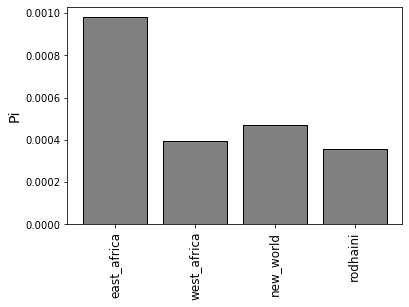

In [302]:
import matplotlib.pyplot as plt
import numpy as np

#init empty dict of pis and mean pairwise distances
pis={}

pops=["east_africa", "west_africa", "new_world", "rodhaini"]

x_labels=[]
y_pis=[]

#calculate pi
for pop in pops:
    mpwd     = allel.mean_pairwise_difference(pop_ac[pop], fill=0)
    pis[pop] = np.sum(mpwd) / accessible_bps
    
    y_pis.append(pis[pop])
    x_labels.append(pop)

#plot
plt.bar(x=list(range(0,len(pops))), 
        height=y_pis, 
        color="grey", 
        edgecolor="black", 
        tick_label=x_labels
        )
plt.xticks(rotation =  90, fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel("Pi", fontsize=14)


plt.savefig("results/pi/pi.svg", format="svg")
plt.savefig("results/pi/i.png",  format="png")


### admixture (defining populations)

In [258]:
%%bash

#clean and create dir if necessary
if [ -d results/admixture ]; then
    rm -r results/admixture
fi
mkdir results/admixture


#since all the rodhaini samples are effectivley from the same host, we are removing all but one before
#  checking for ld
vcftools \
    --vcf results/variant_filtration/smv7_ex_autosomes.vcf \
    --remove-indv ERX284221 \
    --remove-indv ERR310938 \
    --remove-indv Sro_female_1.2_CCGACAAC \
    --remove-indv Sro_female_2.1_CCTAATCC \
    --remove-indv Sro_female_2.2_CCTCTATC \
    --remove-indv Sro_male_1.1_ATCATTCC \
    --remove-indv Sro_male_1.2_ATTGGCTC \
    --remove-indv Sro_male_2.1_CAAGGAGC \
    --remove-indv Sro_male_2.2_CACCTTAC \
    --stdout \
    --recode \
    --recode-INFO-all \
    >results/admixture/smv7_ex_autosomes_no-marg_1-rod.vcf
    
#get ld sites
plink \
    --vcf results/admixture/smv7_ex_autosomes_no-marg_1-rod.vcf \
    --double-id \
    --allow-extra-chr \
    --indep-pairwise 250kb 1 0.20 \
    --out results/admixture/smv7_ex_autosomes_no-marg_1-rod_ld
    
#extract SNPs in LD from file with all rodhaini
vcftools \
    --vcf results/variant_filtration/smv7_ex_autosomes.vcf \
    --exclude results/admixture/smv7_ex_autosomes_no-marg_1-rod_ld.prune.out \
    --remove-indv ERX284221 \
    --recode \
    --recode-INFO-all \
    --stdout \
    >results/admixture/smv7_ex_autosomes_no-marg_1-rod_ld.vcf

#convert to ped 1/2 format
plink \
    --vcf results/admixture/smv7_ex_autosomes_no-marg_1-rod_ld.vcf \
    --out results/admixture/smv7_ex_autosomes_no-marg_1-rod_ld \
    --double-id \
    --recode12 \
    --allow-extra-chr

#create a sample list (for plotting)
grep "#" results/admixture/smv7_ex_autosomes_no-marg_1-rod_ld.vcf \
    | tail -n1 \
    | cut -f10- \
    | sed 's/\t/\n/g' \
    >results/admixture/samples.list

PLINK v1.90b4 64-bit (20 Mar 2017)             www.cog-genomics.org/plink/1.9/
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to results/admixture/smv7_ex_autosomes_no-marg_1-rod_ld.log.
Options in effect:
  --allow-extra-chr
  --double-id
  --indep-pairwise 250kb 1 0.20
  --out results/admixture/smv7_ex_autosomes_no-marg_1-rod_ld
  --vcf results/admixture/smv7_ex_autosomes_no-marg_1-rod.vcf

24158 MB RAM detected; reserving 12079 MB for main workspace.
Allocated 6794 MB successfully, after larger attempt(s) failed.
--vcf: results/admixture/smv7_ex_autosomes_no-marg_1-rod_ld-temporary.bed +
results/admixture/smv7_ex_autosomes_no-marg_1-rod_ld-temporary.bim +
results/admixture/smv7_ex_autosomes_no-marg_1-rod_ld-temporary.fam written.
475081 variants loaded from .bim file.
147 people (0 males, 0 females, 147 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
results/admixture/smv7_ex_autosomes_no-marg_1-rod_ld.nosex .
Using 1 thread (no mult


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf results/variant_filtration/smv7_ex_autosomes.vcf
	--recode-INFO-all
	--recode
	--stdout
	--remove-indv ERR310938
	--remove-indv ERX284221
	--remove-indv Sro_female_1.2_CCGACAAC
	--remove-indv Sro_female_2.1_CCTAATCC
	--remove-indv Sro_female_2.2_CCTCTATC
	--remove-indv Sro_male_1.1_ATCATTCC
	--remove-indv Sro_male_1.2_ATTGGCTC
	--remove-indv Sro_male_2.1_CAAGGAGC
	--remove-indv Sro_male_2.2_CACCTTAC

Excluding individuals in 'exclude' list
After filtering, kept 147 out of 156 Individuals
Outputting VCF file...
After filtering, kept 475081 out of a possible 475081 Sites
Run Time = 540.00 seconds

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf results/variant_filtration/smv7_ex_autosomes.vcf
	--recode-INFO-all
	--recode
	--exclude results/admixture/smv7_ex_autosomes_no-marg_1-rod_ld.prune.out
	--stdout
	--remove-indv ERX284221

Excluding individu

In [259]:
%%bash

#run unsupervised admixture analysis on k1-20
cd results/admixture
for K in $(seq -w 1 20); do

    CMD="conda activate sch_man_nwinvasion-nbanalyses; admixture \
        --cv \
        -j10 \
        smv7_ex_autosomes_no-marg_1-rod_ld.ped \
        $K \
        >smv7_ex_autosomes_no-marg_1-rod_ld_k$K.log"
        
    echo $CMD | qsub -V -cwd -S /bin/bash -q all.q -j y -N K"$K"_adm_sm -o K"$K"_adm_sm.log -pe smp 12
   
done
cd ../../

Your job 4972080 ("K01_adm_sm") has been submitted
Your job 4972081 ("K02_adm_sm") has been submitted
Your job 4972082 ("K03_adm_sm") has been submitted
Your job 4972083 ("K04_adm_sm") has been submitted
Your job 4972084 ("K05_adm_sm") has been submitted
Your job 4972085 ("K06_adm_sm") has been submitted
Your job 4972086 ("K07_adm_sm") has been submitted
Your job 4972087 ("K08_adm_sm") has been submitted
Your job 4972088 ("K09_adm_sm") has been submitted
Your job 4972089 ("K10_adm_sm") has been submitted
Your job 4972090 ("K11_adm_sm") has been submitted
Your job 4972091 ("K12_adm_sm") has been submitted
Your job 4972092 ("K13_adm_sm") has been submitted
Your job 4972093 ("K14_adm_sm") has been submitted
Your job 4972094 ("K15_adm_sm") has been submitted
Your job 4972095 ("K16_adm_sm") has been submitted
Your job 4972096 ("K17_adm_sm") has been submitted
Your job 4972097 ("K18_adm_sm") has been submitted
Your job 4972098 ("K19_adm_sm") has been submitted
Your job 4972099 ("K20_adm_sm")

In [272]:
%%bash

#create list of easy to work with Q values were samples are labeled/indexed
for K in $(seq 1 20); do

    paste results/admixture/samples.list \
        results/admixture/smv7_ex_autosomes_no-marg_1-rod_ld.$K.Q \
        >results/admixture/smv7_ex_autosomes_no-marg_1-rod_ldg.$K.labeled_Q
done


#when all runs are done get CV scores
grep CV results/admixture/smv7_ex_autosomes_no-marg_1-rod_ld*.log \
    | sort -n \
    | awk '{print $3"\t"$4}' \
    | sed 's/(//' \
    | sed 's/)//' \
    | sed 's/://' \
    >results/admixture/cv_table.tsv

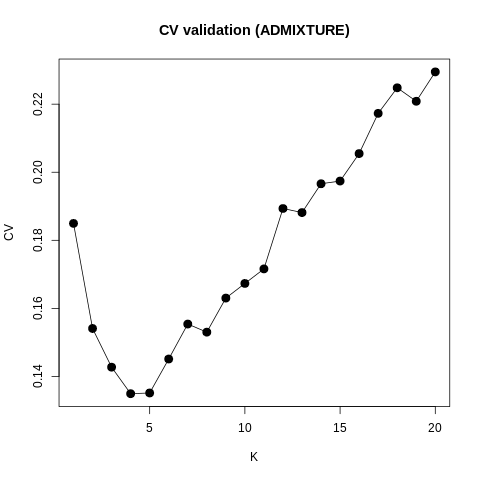

In [275]:
%%R

tbl<-read.table("results/admixture/cv_table.tsv")
colnames(tbl)<-c("k", "cv")

#svg("results/admixture/smv7_ex_autosomes_ld_k1-20_cv_table.svg")
    plot(tbl$cv, 
         type="o", 
         pch=19, 
         cex=1.5, 
         xlab="K", 
         ylab="CV", 
         main="CV validation (ADMIXTURE)")
#dev.off()

In [278]:
%%R

svg("results/admixture/smv7_ex_autosomes_ld_k4-5.svg")
    space=c(rep(0.1, 9),
            5,
            rep(0.1, 2), 5, rep(0.1, 47),
            5,
            rep(0.1, 10), 2, rep(0.1, 25),
            5,
            rep(0.1, 2), 2, rep(0.1, 55)
            )

    par(mfrow=c(2,1),
    mar=c(0.25,4,1.5,0.25))

    for (k in seq(4,5)){
        
        tbl=read.table(paste("results/admixture/smv7_ex_autosomes_no-marg_1-rod_ld.", k, ".Q", sep=""))
        
        barplot(t(as.matrix(tbl)), 
                col=rainbow(k),
                xlab="", 
                ylab=paste("k=", k, sep=""), 
                border=NA,
                space=space
        )
    }
dev.off()


png 
  2 


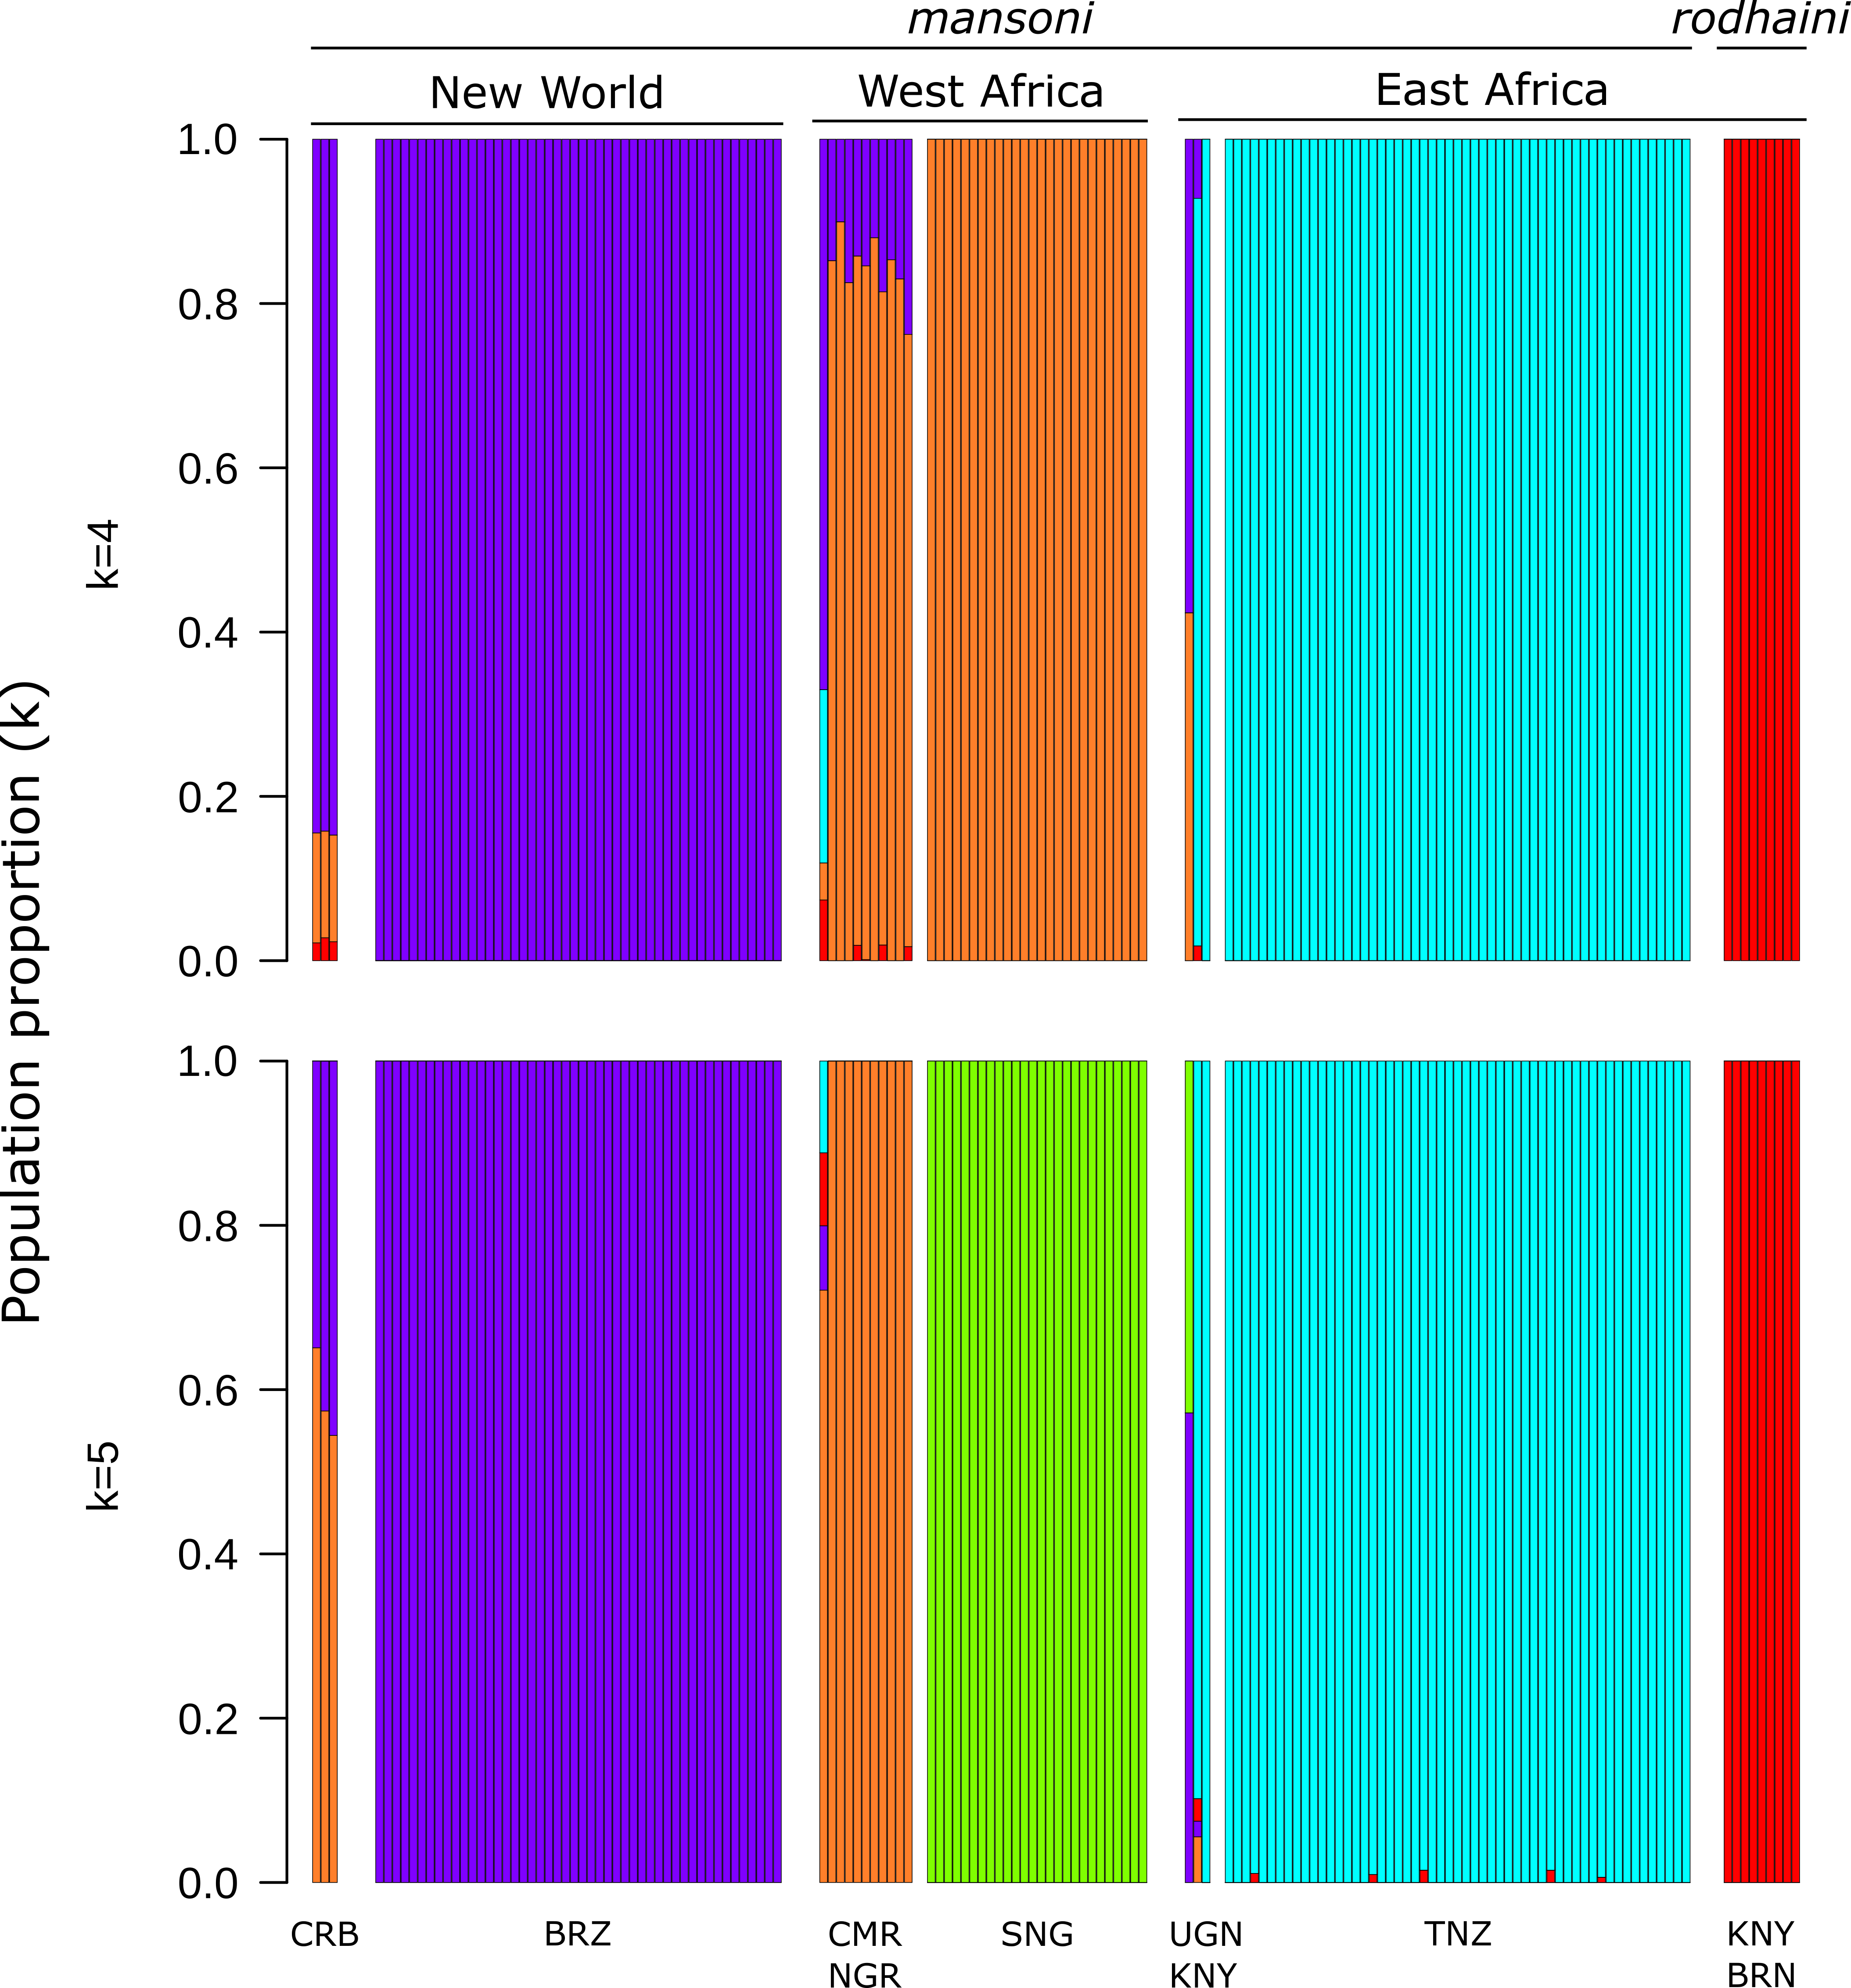

In [279]:
Image(filename="results/admixture/smv7_ex_autosomes_ld_k4-5_mod.png")

### PCA

In [218]:
#make a clean dir
if os.path.isdir("results/pca"):
    shutil.rmtree("results/pca")
os.mkdir("results/pca")

#### PCA w/o rodhaini

In [228]:
%%bash

vcftools \
    --vcf results/variant_filtration/smv7_ex_autosomes.vcf \
    --remove-indv ERX284221 \
    --remove-indv Sro_female_1.2_CCGACAAC \
    --remove-indv Sro_female_2.1_CCTAATCC \
    --remove-indv Sro_female_2.2_CCTCTATC \
    --remove-indv Sro_male_1.1_ATCATTCC \
    --remove-indv Sro_male_1.2_ATTGGCTC \
    --remove-indv Sro_male_2.1_CAAGGAGC \
    --remove-indv Sro_male_2.2_CACCTTAC \
    --stdout \
    --recode \
    --recode-INFO-all \
    >results/pca/smv7_ex_autosomes_no-marg_1rod.vcf
    
#convert to ped 1/2 format
plink \
    --vcf results/pca/smv7_ex_autosomes_no-marg_1rod.vcf \
    --out results/pca/smv7_ex_autosomes_no-marg_1rod \
    --double-id \
    --recode12 \
    --allow-extra-chr

#create a sample list (for plotting)
grep "#" results/pca/smv7_ex_autosomes_no-marg_1rod.vcf \
    | tail -n1 \
    | cut -f10- \
    | sed 's/\t/\n/g' \
    >results/pca/samples_no-marg_1rod.list

#run PCA
plink \
    --vcf results/pca/smv7_ex_autosomes_no-marg_1rod.vcf \
    --double-id \
    --pca \
    --allow-extra-chr \
    --out results/pca/smv7_ex_autosomes_no-marg_1rod_pca


PLINK v1.90b4 64-bit (20 Mar 2017)             www.cog-genomics.org/plink/1.9/
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Note: --recode12 flag deprecated.  Use 'recode 12 ...'.
Logging to results/pca/smv7_ex_autosomes_no-marg_1rod.log.
Options in effect:
  --allow-extra-chr
  --double-id
  --out results/pca/smv7_ex_autosomes_no-marg_1rod
  --recode 12
  --vcf results/pca/smv7_ex_autosomes_no-marg_1rod.vcf

24158 MB RAM detected; reserving 12079 MB for main workspace.
Allocated 6794 MB successfully, after larger attempt(s) failed.
--vcf: results/pca/smv7_ex_autosomes_no-marg_1rod-temporary.bed +
results/pca/smv7_ex_autosomes_no-marg_1rod-temporary.bim +
results/pca/smv7_ex_autosomes_no-marg_1rod-temporary.fam written.
475081 variants loaded from .bim file.
148 people (0 males, 0 females, 148 ambiguous) loaded from .fam.
Ambiguous sex IDs written to results/pca/smv7_ex_autosomes_no-marg_1rod.nosex .
Using 1 thread (no multithreaded calculations invoke


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf results/variant_filtration/smv7_ex_autosomes.vcf
	--recode-INFO-all
	--recode
	--stdout
	--remove-indv ERX284221
	--remove-indv Sro_female_1.2_CCGACAAC
	--remove-indv Sro_female_2.1_CCTAATCC
	--remove-indv Sro_female_2.2_CCTCTATC
	--remove-indv Sro_male_1.1_ATCATTCC
	--remove-indv Sro_male_1.2_ATTGGCTC
	--remove-indv Sro_male_2.1_CAAGGAGC
	--remove-indv Sro_male_2.2_CACCTTAC

Excluding individuals in 'exclude' list
After filtering, kept 148 out of 156 Individuals
Outputting VCF file...
After filtering, kept 475081 out of a possible 475081 Sites
Run Time = 581.00 seconds


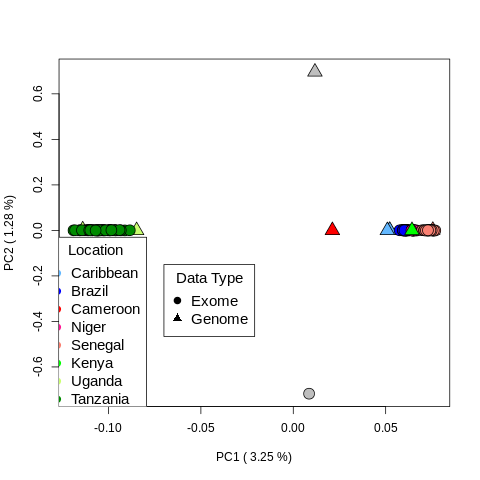

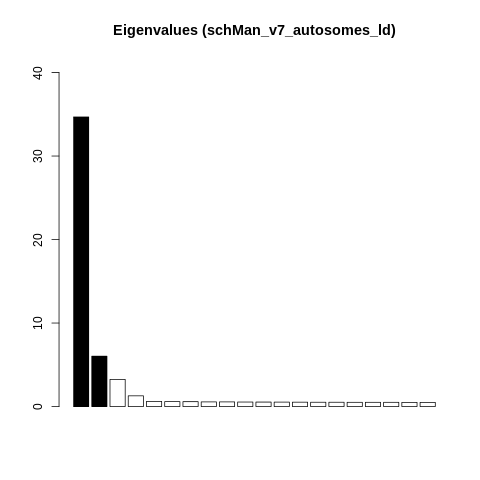

In [248]:
%%R

pop_colors <- c("tanzania"      = "green4",
                "uganda"        = "darkolivegreen1",
                "kenya"         = "green",
                "cameroon"      = "red",
                "niger"         = "deeppink",
                "senegal"       = "salmon",
                "brazil"        = "blue",
                "caribbean"     = "steelblue1",
                "rodhaini"      = "grey")

shapes <- c("genome" = 24,
            "exome"  = 21 )

eg_vec<-read.table("../sch_man_nwinvasion/results/pca/smv7_ex_autosomes_no-marg_1rod_pca.eigenvec", header=FALSE)
eg_val<-read.table("../sch_man_nwinvasion/results/pca/smv7_ex_autosomes_no-marg_1rod_pca.eigenval", header=FALSE)
samples<-scan("../sch_man_nwinvasion/results/pca/samples_no-marg_1rod.list", what="character")


colors<-c( rep(pop_colors["rodhaini"],  2),
           rep(pop_colors["caribbean"], 3),
           rep(pop_colors["brazil"],    48),
           rep(pop_colors["cameroon"],  1),
           rep(pop_colors["niger"],     10),
           rep(pop_colors["senegal"],   26),
           rep(pop_colors["kenya"],     1),
           rep(pop_colors["uganda"],    2),
           rep(pop_colors["tanzania"],  55) )

shapes<-c( rep(shapes["genome"],  1),
           rep(shapes["exome"],   1),
           rep(shapes["genome"],  3),
           rep(shapes["exome"],  48),
           rep(shapes["genome"],  1),
           rep(shapes["exome"],  10),
           rep(shapes["genome"],  1),
           rep(shapes["exome"],  25),
           rep(shapes["genome"],  3),
           rep(shapes["exome"],  55) )

PC1_val<-eg_val$V1[1]
PC2_val<-eg_val$V1[2]

#par(mfrow=c(1,2))
svg("results/pca/smv7_ex_autosomes_no-marg_1rod_pca.svg")
    plot(eg_vec$V3, eg_vec$V4, 
         cex  =2, 
         pch  =shapes, 
         bg   =colors, 
         col  ="black",
         xlab =paste("PC1 (", round(PC1_val, digits=2), "%)"),
         ylab =paste("PC2 (", round(PC2_val, digits=2), "%)"),
        #main="PCA unlinked autosomes"
        )
        
    legend(-0.135, -0.030, 
           legend=c("Caribbean", 
                    "Brazil", 
                    "Cameroon", 
                    "Niger", 
                    "Senegal", 
                    "Kenya", 
                    "Uganda", 
                    "Tanzania", 
                    "S. rodhaini"),
           pch=19,
           col=c(pop_colors["caribbean"],
                 pop_colors["brazil"],
                 pop_colors["cameroon"],
                 pop_colors["niger"],
                 pop_colors["senegal"],
                 pop_colors["kenya"],
                 pop_colors["uganda"],
                 pop_colors["tanzania"],
                 pop_colors["rodhaini"] ),
           title="Location",
           cex=1.25
           )

    legend(-0.07, -0.15, 
          legend  = c("Exome", "Genome"),
          pch   = c(19, 17),
          title="Data Type",
          cex=1.25
               
           )
dev.off()

svg("results/pca/smv7_ex_autosomes_no-marg_1rod_pca_eigenvalues.svg")
    barplot(eg_val$V1,
            ylim=c(0,max(eg_val$V1)*1.2),
            col=c(rep("black", 2), rep("white", 18)),
            main="Eigenvalues (schMan_v7_autosomes_ld)")
dev.off()

#### PCA w/o rodhaini

In [231]:
%%bash

vcftools \
    --vcf results/variant_filtration/smv7_ex_autosomes.vcf \
    --remove-indv ERX284221 \
    --remove-indv ERR310938 \
    --remove-indv Sro_female_1.1_CCATCCTC \
    --remove-indv Sro_female_1.2_CCGACAAC \
    --remove-indv Sro_female_2.1_CCTAATCC \
    --remove-indv Sro_female_2.2_CCTCTATC \
    --remove-indv Sro_male_1.1_ATCATTCC \
    --remove-indv Sro_male_1.2_ATTGGCTC \
    --remove-indv Sro_male_2.1_CAAGGAGC \
    --remove-indv Sro_male_2.2_CACCTTAC \
    --stdout \
    --recode \
    --recode-INFO-all \
    >results/pca/smv7_ex_autosomes_no-marg_no-rod.vcf
    
#convert to ped 1/2 format
plink \
    --vcf results/pca/smv7_ex_autosomes_no-marg_no-rod.vcf \
    --out results/pca/smv7_ex_autosomes_no-marg_no-rod \
    --double-id \
    --recode12 \
    --allow-extra-chr

#create a sample list (for plotting)
grep "#" results/pca/smv7_ex_autosomes_no-marg_no-rod.vcf \
    | tail -n1 \
    | cut -f10- \
    | sed 's/\t/\n/g' \
    >results/pca/samples_no-marg_no-rod.list

#run PCA
plink \
    --vcf results/pca/smv7_ex_autosomes_no-marg_no-rod.vcf \
    --double-id \
    --pca \
    --allow-extra-chr \
    --out results/pca/smv7_ex_autosomes_no-marg_no-rod_pca


PLINK v1.90b4 64-bit (20 Mar 2017)             www.cog-genomics.org/plink/1.9/
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Note: --recode12 flag deprecated.  Use 'recode 12 ...'.
Logging to results/pca/smv7_ex_autosomes_no-marg_no-rod.log.
Options in effect:
  --allow-extra-chr
  --double-id
  --out results/pca/smv7_ex_autosomes_no-marg_no-rod
  --recode 12
  --vcf results/pca/smv7_ex_autosomes_no-marg_no-rod.vcf

24158 MB RAM detected; reserving 12079 MB for main workspace.
Allocated 6794 MB successfully, after larger attempt(s) failed.
--vcf: results/pca/smv7_ex_autosomes_no-marg_no-rod-temporary.bed +
results/pca/smv7_ex_autosomes_no-marg_no-rod-temporary.bim +
results/pca/smv7_ex_autosomes_no-marg_no-rod-temporary.fam written.
475081 variants loaded from .bim file.
146 people (0 males, 0 females, 146 ambiguous) loaded from .fam.
Ambiguous sex IDs written to results/pca/smv7_ex_autosomes_no-marg_no-rod.nosex
.
Using 1 thread (no multithreaded calcu


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf results/variant_filtration/smv7_ex_autosomes.vcf
	--recode-INFO-all
	--recode
	--stdout
	--remove-indv ERR310938
	--remove-indv ERX284221
	--remove-indv Sro_female_1.1_CCATCCTC
	--remove-indv Sro_female_1.2_CCGACAAC
	--remove-indv Sro_female_2.1_CCTAATCC
	--remove-indv Sro_female_2.2_CCTCTATC
	--remove-indv Sro_male_1.1_ATCATTCC
	--remove-indv Sro_male_1.2_ATTGGCTC
	--remove-indv Sro_male_2.1_CAAGGAGC
	--remove-indv Sro_male_2.2_CACCTTAC

Excluding individuals in 'exclude' list
After filtering, kept 146 out of 156 Individuals
Outputting VCF file...
After filtering, kept 475081 out of a possible 475081 Sites
Run Time = 619.00 seconds


In [240]:
%%R

pop_colors <- c("tanzania"      = "green4",
                "uganda"        = "darkolivegreen1",
                "kenya"         = "green",
                "cameroon"      = "red",
                "niger"         = "deeppink",
                "senegal"       = "salmon",
                "brazil"        = "blue",
                "caribbean"     = "steelblue1",
                "rodhaini"      = "grey")

shapes <- c("genome" = 24,
            "exome"  = 21 )

eg_vec<-read.table("../sch_man_nwinvasion/results/pca/smv7_ex_autosomes_no-marg_no-rod_pca.eigenvec", header=FALSE)
eg_val<-read.table("../sch_man_nwinvasion/results/pca/smv7_ex_autosomes_no-marg_no-rod_pca.eigenval", header=FALSE)
samples<-scan("../sch_man_nwinvasion/results/pca/samples_no-marg_no-rod.list", what="character")


colors<-c( rep(pop_colors["rodhaini"],  0),
           rep(pop_colors["caribbean"], 3),
           rep(pop_colors["brazil"],    48),
           rep(pop_colors["cameroon"],  1),
           rep(pop_colors["niger"],     10),
           rep(pop_colors["senegal"],   26),
           rep(pop_colors["kenya"],     1),
           rep(pop_colors["uganda"],    2),
           rep(pop_colors["tanzania"],  55) )

shapes<-c( rep(shapes["genome"],  0),
           rep(shapes["exome"],   0),
           rep(shapes["genome"],  3),
           rep(shapes["exome"],  48),
           rep(shapes["genome"],  1),
           rep(shapes["exome"],  10),
           rep(shapes["genome"],  1),
           rep(shapes["exome"],  25),
           rep(shapes["genome"],  3),
           rep(shapes["exome"],  55) )

PC1_val<-eg_val$V1[1]
PC2_val<-eg_val$V1[2]

#par(mfrow=c(1,2))
svg("results/pca/smv7_ex_autosomes_no-marg_no-rod_pca.svg")
    plot(eg_vec$V3, eg_vec$V4, 
         cex  =2, 
         pch  =shapes, 
         bg   =colors, 
         col  ="black",
         xlab =paste("PC1 (", round(PC1_val, digits=2), "%)"),
         ylab =paste("PC2 (", round(PC2_val, digits=2), "%)"),
        #main="PCA unlinked autosomes"
        )
        
    legend(-0.1, -0.025, 
           legend=c("Caribbean", 
                    "Brazil", 
                    "Cameroon", 
                    "Niger", 
                    "Senegal", 
                    "Kenya", 
                    "Uganda", 
                    "Tanzania" ),
           pch=15,
           col=c(pop_colors["caribbean"],
                 pop_colors["brazil"],
                 pop_colors["cameroon"],
                 pop_colors["niger"],
                 pop_colors["senegal"],
                 pop_colors["kenya"],
                 pop_colors["uganda"],
                 pop_colors["tanzania"]),
           title="Location",
           cex=1.25
           )

    legend(-0.04, -0.1, 
          legend  = c("Exome", "Genome"),
          pch   = c(19, 17),
          title="Data Type",
          cex=1.25
               
           )
dev.off()

svg("results/pca/smv7_ex_autosomes_no-marg_no-rod_pca_eigenvalues.svg")
    barplot(eg_val$V1,
            ylim=c(0,max(eg_val$V1)*1.2),
            col=c(rep("black", 2), rep("white", 18)),
            main="Eigenvalues (schMan_v7_autosomes_ld)")
dev.off()

png 
  2 


#### PCA results

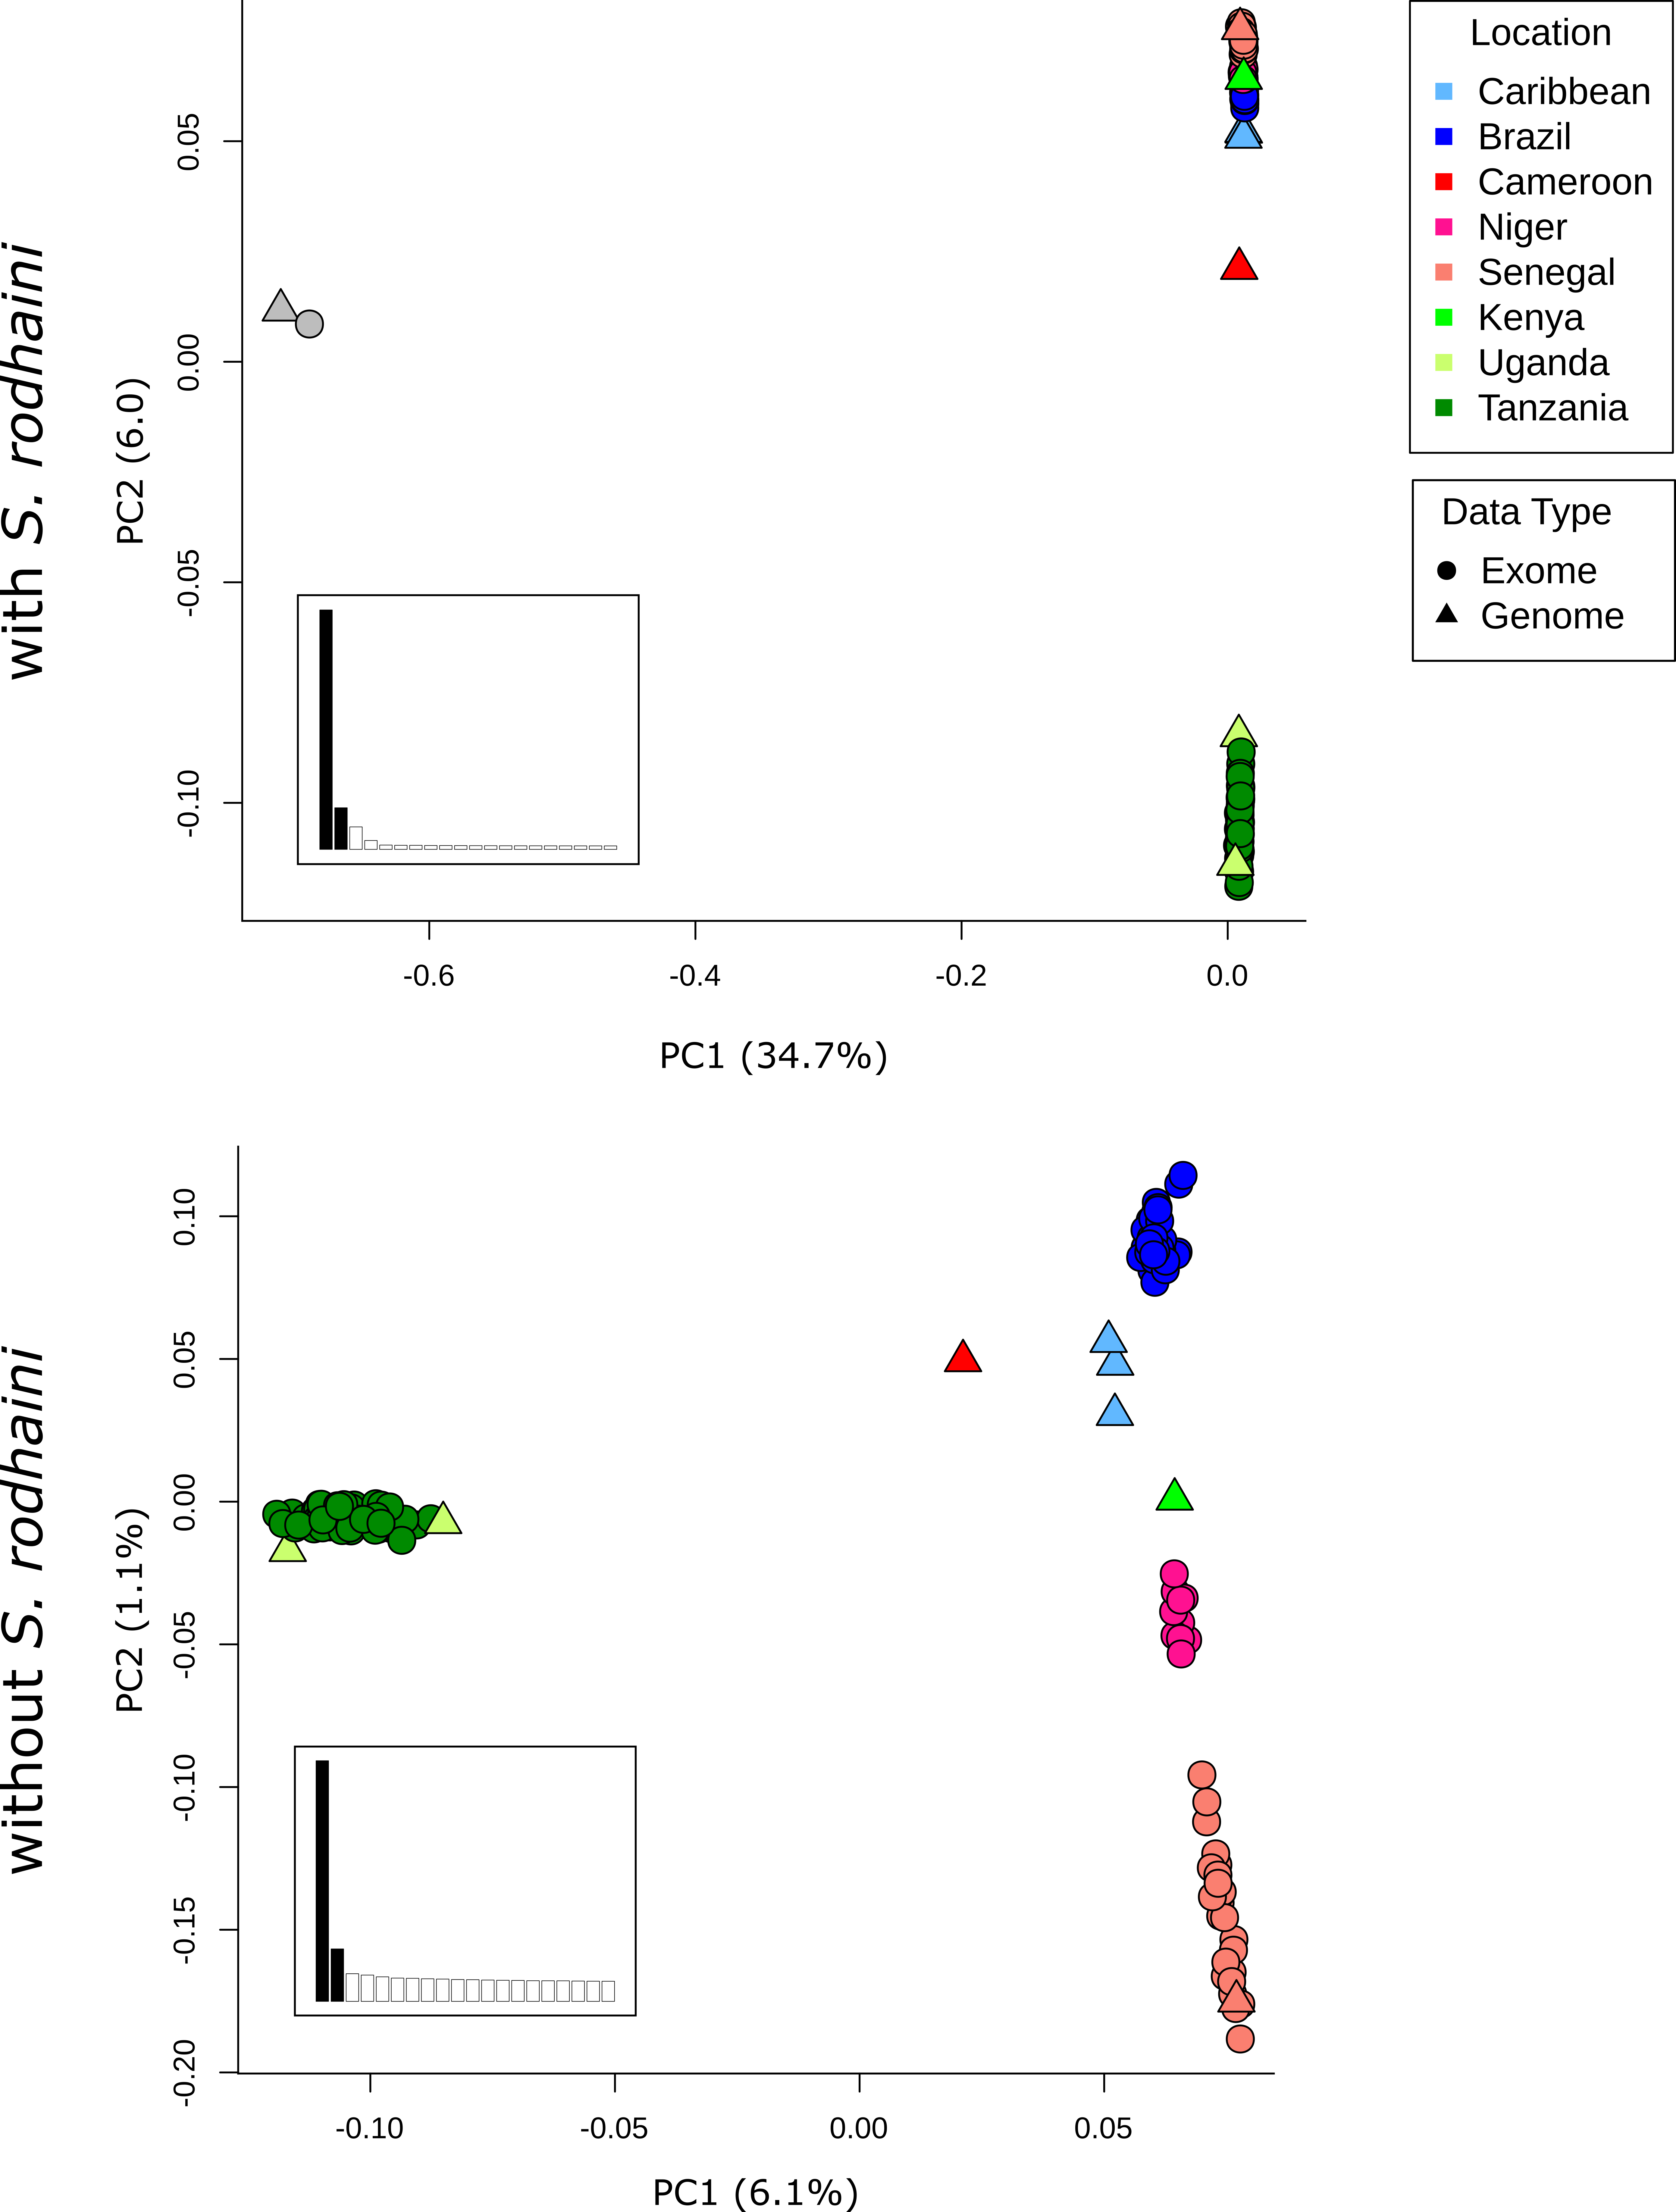

In [249]:
Image(filename="results/pca/smv7_ex_autosomes_pca_mod.png")

### Fst

In [75]:
import allel

#make a clean dir
# if os.path.isdir("results/fst"):
#     shutil.rmtree("results/fst")
# os.mkdir("results/fst")

fst_outfile = open('results/fst/average_wcfsts.txt', 'w')
#set fst window
blen_window = 100

fst_comparisons = [ ["rodhaini",    "west_africa"],
                    ["rodhaini",    "east_africa"],
                    ["rodhaini",    "new_world"],
                    ["west_africa", "east_africa"],
                    ["west_africa", "new_world"],
                    ["east_africa", "new_world"]  ]

fsts=[]
labels=[]
ses=[]
window_fsts=[]
                   
#calculate pi
for fst_comparison in fst_comparisons:
    pop1  = fst_comparison[0]
    pop2  = fst_comparison[1]
    label = pop1 + "_V_" + pop2
    
    fst, se , *windows = allel.average_weir_cockerham_fst( sm_gt, [pop_idxs[pop1], pop_idxs[pop2]], blen_window )
    
    fsts.append(fst)
    ses.append(se)
    window_fsts.append(windows)
    labels.append(label)                 
    
    fst_outfile.write('{},{},{},{}\n'.format(pop1, pop2, fst, se))
    
fst_outfile.close()

/master/nplatt/anaconda3/envs/sch_man_nwinvasion-nbanalyses/lib/python3.7/site-packages/allel/stats/fst.py:187: RuntimeWarning: invalid value encountered in true_divide
  p = ac / an[:, np.newaxis, :]
/master/nplatt/anaconda3/envs/sch_man_nwinvasion-nbanalyses/lib/python3.7/site-packages/allel/stats/fst.py:228: RuntimeWarning: divide by zero encountered in true_divide
  a = ((n_bar / n_C) *
/master/nplatt/anaconda3/envs/sch_man_nwinvasion-nbanalyses/lib/python3.7/site-packages/allel/stats/fst.py:710: RuntimeWarning: invalid value encountered in true_divide
  vb = num_bsum / den_bsum
/master/nplatt/anaconda3/envs/sch_man_nwinvasion-nbanalyses/lib/python3.7/site-packages/allel/stats/fst.py:230: RuntimeWarning: divide by zero encountered in true_divide
  ((1 / (n_bar - 1)) *
/master/nplatt/anaconda3/envs/sch_man_nwinvasion-nbanalyses/lib/python3.7/site-packages/allel/stats/fst.py:237: RuntimeWarning: divide by zero encountered in true_divide
  b = ((n_bar / (n_bar - 1)) *


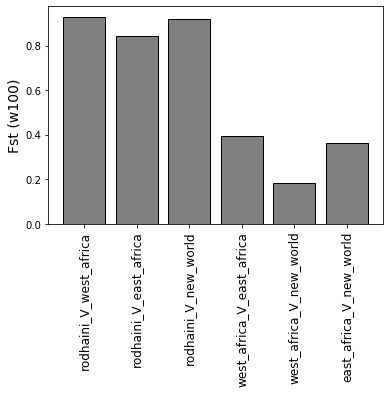

In [77]:
import matplotlib.pyplot as plt
#import numpy as np

#start plotting in matplot
plt.bar(x = list(range(0,len(fsts))), 
        height     = fsts, 
        color      = "grey", 
        edgecolor  = "black", 
        tick_label = labels )
plt.xticks(rotation =  90, fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel("Fst (w" + str(blen_window) + ")", fontsize=14)

#save as svg and png
plt.savefig("results/fst/schman_average_fst.svg", format="svg")
plt.savefig("results/fst/schman_average_fst.png", format="png")


### LD

In [153]:
#make lists for each population
if not os.path.isdir("results/ld"):
    os.mkdir("results/ld")

ld_pops=["east_africa", "west_africa", "new_world"]

for pop in ld_pops:
    list_file="results/ld/" + pop + ".list"
    with open(list_file, 'w') as filehandle:  
        filehandle.writelines("%s\n" % sample for sample in pop_ids[pop])

In [155]:
%%bash

#get pop specific VCF files
for POP in east_africa west_africa new_world; do
    if [ ! -f results/ld/schMan_v7_"$POP"_ld_dist.tbl ]; then
        rm results/ld/schMan_v7_"$POP"_ld_dist.tbl
    fi
    
    for CHR in "1" "2" "3" "4" "5" "6" "7"; do
    
        CHR="SM_V7_$CHR"
    
        #get pop specific chr vcf
   
        vcftools \
            --vcf results/variant_filtration/smv7_ex_autosomes.vcf \
            --chr $CHR \
            --keep results/ld/$POP.list \
            --recode \
            --recode-INFO-all \
            --stdout \
            >results/ld/smv7_ex_autosomes_"$POP"_"$CHR".vcf
    
        plink \
            --threads 6 \
            --vcf results/ld/smv7_ex_autosomes_"$POP"_"$CHR".vcf \
            --out results/ld/smv7_ex_autosomes_"$POP"_"$CHR" \
            --double-id\
            --recode12 \
            --allow-extra-chr

        #calculate R2 between all snps on a chr
        plink \
            --threads 6 \
            --r2 \
            --file results/ld/smv7_ex_autosomes_"$POP"_"$CHR" \
            --out results/ld/smv7_ex_autosomes_"$POP"_"$CHR" \
            --double-id \
            --allow-extra-chr \
            --ld-window-r2 0.0 \
            --ld-window 1000000 \
            --ld-window-kb 90000
            
        #calc distance and generate a single table
        awk '{print $0"\t"$5-$2}' \
            results/ld/smv7_ex_autosomes_"$POP"_"$CHR".ld \
            >>results/ld/smv7_ex_autosomes__"$POP"_ld_dist.tbl
                
        #clean up
        rm results/ld/smv7_ex_autosomes_"$POP"_"$CHR".ld
        rm results/ld/smv7_ex_autosomes_"$POP"_"$CHR".map
        rm results/ld/smv7_ex_autosomes_"$POP"_"$CHR".ped
        rm results/ld/smv7_ex_autosomes_"$POP"_"$CHR".log
        rm results/ld/smv7_ex_autosomes_"$POP"_"$CHR".nosex
        rm results/ld/smv7_ex_autosomes_"$POP"_"$CHR".vcf

    done
    
        #remove the header line from the table (duplicated from each chrom)
        sed -i -e '1p' -e '/CHR/d' results/ld/smv7_ex_autosomes_"$POP"_ld_dist.tbl 
        sed -i -e '1s/0/BP_DISTANCE/' results/ld/smv7_ex_autosomes_"$POP"_ld_dist.tbl
        
        #create a file with distances lt 500kb
        awk '{if ($8 <= 500000) print $0}' results/ld/smv7_ex_autosomes_"$POP"_ld_dist.tbl \
            >results/ld/smv7_ex_autosomes_"$POP"_ld_dist_lt500kb.tbl
done

PLINK v1.90b4 64-bit (20 Mar 2017)             www.cog-genomics.org/plink/1.9/
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Note: --recode12 flag deprecated.  Use 'recode 12 ...'.
Logging to results/ld/smv7_ex_autosomes_east_africa_SM_V7_1.log.
Options in effect:
  --allow-extra-chr
  --double-id
  --out results/ld/smv7_ex_autosomes_east_africa_SM_V7_1
  --recode 12
  --threads 6
  --vcf results/ld/smv7_ex_autosomes_east_africa_SM_V7_1.vcf

24158 MB RAM detected; reserving 12079 MB for main workspace.
--vcf: results/ld/smv7_ex_autosomes_east_africa_SM_V7_1-temporary.bed +
results/ld/smv7_ex_autosomes_east_africa_SM_V7_1-temporary.bim +
results/ld/smv7_ex_autosomes_east_africa_SM_V7_1-temporary.fam written.
162219 variants loaded from .bim file.
58 people (0 males, 0 females, 58 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
results/ld/smv7_ex_autosomes_east_africa_SM_V7_1.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before

rm: cannot remove `results/ld/schMan_v7_east_africa_ld_dist.tbl': No such file or directory

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf results/variant_filtration/smv7_ex_autosomes.vcf
	--chr SM_V7_1
	--keep results/ld/east_africa.list
	--recode-INFO-all
	--recode
	--stdout

Keeping individuals in 'keep' list
After filtering, kept 58 out of 156 Individuals
Outputting VCF file...
After filtering, kept 162219 out of a possible 475081 Sites
Run Time = 91.00 seconds

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf results/variant_filtration/smv7_ex_autosomes.vcf
	--chr SM_V7_2
	--keep results/ld/east_africa.list
	--recode-INFO-all
	--recode
	--stdout

Keeping individuals in 'keep' list
After filtering, kept 58 out of 156 Individuals
Outputting VCF file...
After filtering, kept 78902 out of a possible 475081 Sites
Run Time = 78.00 seconds

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta

CalledProcessError: Command 'b'\n#get pop specific VCF files\nfor POP in east_africa west_africa new_world; do\n    if [ ! -f results/ld/schMan_v7_"$POP"_ld_dist.tbl ]; then\n        rm results/ld/schMan_v7_"$POP"_ld_dist.tbl\n    fi\n    \n    for CHR in "1" "2" "3" "4" "5" "6" "7"; do\n    \n        CHR="SM_V7_$CHR"\n    \n        #get pop specific chr vcf\n   \n        vcftools \\\n            --vcf results/variant_filtration/smv7_ex_autosomes.vcf \\\n            --chr $CHR \\\n            --keep results/ld/$POP.list \\\n            --recode \\\n            --recode-INFO-all \\\n            --stdout \\\n            >results/ld/smv7_ex_autosomes_"$POP"_"$CHR".vcf\n    \n        plink \\\n            --threads 6 \\\n            --vcf results/ld/smv7_ex_autosomes_"$POP"_"$CHR".vcf \\\n            --out results/ld/smv7_ex_autosomes_"$POP"_"$CHR" \\\n            --double-id\\\n            --recode12 \\\n            --allow-extra-chr\n\n        #calculate R2 between all snps on a chr\n        plink \\\n            --threads 6 \\\n            --r2 \\\n            --file results/ld/smv7_ex_autosomes_"$POP"_"$CHR" \\\n            --out results/ld/smv7_ex_autosomes_"$POP"_"$CHR" \\\n            --double-id \\\n            --allow-extra-chr \\\n            --ld-window-r2 0.0 \\\n            --ld-window 1000000 \\\n            --ld-window-kb 90000\n            \n        #calc distance and generate a single table\n        awk \'{print $0"\\t"$5-$2}\' \\\n            results/ld/smv7_ex_autosomes_"$POP"_"$CHR".ld \\\n            >>results/ld/smv7_ex_autosomes__"$POP"_ld_dist.tbl\n                \n        #clean up\n        rm results/ld/smv7_ex_autosomes_"$POP"_"$CHR".ld\n        rm results/ld/smv7_ex_autosomes_"$POP"_"$CHR".map\n        rm results/ld/smv7_ex_autosomes_"$POP"_"$CHR".ped\n        rm results/ld/smv7_ex_autosomes_"$POP"_"$CHR".log\n        rm results/ld/smv7_ex_autosomes_"$POP"_"$CHR".nosex\n        rm results/ld/smv7_ex_autosomes_"$POP"_"$CHR".vcf\n\n    done\n    \n        #remove the header line from the table (duplicated from each chrom)\n        sed -i -e \'1p\' -e \'/CHR/d\' results/ld/smv7_ex_autosomes_"$POP"_ld_dist.tbl \n        sed -i -e \'1s/0/BP_DISTANCE/\' results/ld/smv7_ex_autosomes_"$POP"_ld_dist.tbl\n        \n        #create a file with distances lt 500kb\n        awk \'{if ($8 <= 500000) print $0}\' results/ld/smv7_ex_autosomes_"$POP"_ld_dist.tbl \\\n            >results/ld/smv7_ex_autosomes_"$POP"_ld_dist_lt500kb.tbl\ndone\n'' returned non-zero exit status 2.

In [ ]:
%%R
#in R generate summary stats for bins and plot

#500bp bins for 500kb
breaks <- seq( 0, 5e5, 500)

centers   <- vector()
means     <- vector()
pops      <- vector()
smootheds <- vector()

for (pop in c("east_africa", "west_africa", "new_world",)) {
    
    #read in lt 500kb r2 table from vcftools
    ld_table <- read.table(paste("results/ld/schMan_v7_maf05_", pop, "_ld_dist_lt500kb.tbl", sep=""), 
                           header=FALSE)
    
    #bin r2 values and calculate stats
    ld_binned <- stats.bin(ld_table$V8, ld_table$V7, breaks = breaks)
    
    #created regression line
    loessMod  <- loess(ld_binned$stats["mean",] ~ ld_binned$centers, span=0.50)
    smoothed  <- predict(loessMod)
    
    #append all data to vectors
    centers   <- append(centers, ld_binned$centers)
    means     <- append(means, ld_binned$stats["mean",])
    pops      <- append(pops, rep(pop, length(ld_binned$centers)))
    smootheds <- append(smootheds, smoothed)
}    

#build the dataframe and save to csv
r2_df <- data.frame(centers, means, pops, smootheds)
write.csv(r2_df, file = paste("results/ld/ld_dist_lt500kb_binned_smoothed.csv", sep="") ,row.names=FALSE)

#subset desired populations
major_groups <- subset(r2_df, pops == "east_africa" | 
                              pops == "west_africa" |
                              pops == "new_world" ) 



In [ ]:
%%R

pop_colors <- c("eafrica"   = "green",
                "oman"      = "yellow", 
                "wafrica"   = "red",
                "brazil_x"  = "purple",
                "caribbean" = "blue")

#start plotting
p <- ggplot(major_groups, aes(x     = centers, 
                              y     = means, 
                              color = pops))

#adjust colors
p <- p + scale_colour_manual(values = pop_colors)

#plot data
p <- p + geom_point(alpha = 0.0)

#smooth data with loess
p <- p + geom_smooth(span   = 0.75, 
                     method = "loess", 
                     lwd    = 1, 
                     se     = FALSE)

#modify x and y axis
p <- p + scale_x_continuous(name   = "Distance between SNPs (Kb)", 
                            breaks = seq(0,500000,100000), 
                            labels = c("0", "100", "200", "300", "400", "500"), 
                            expand = c(0,0),
                            )
p <- p + scale_y_continuous(name   = "Mean R2", 
                            expand = c(0,0), 
                            limits = c(0,1))

#change theme
p <- p + theme_bw()

#change fonts on axis elements and titles
p <- p + theme(axis.text  = element_text(size = 12),
               axis.title = element_text(size = 14,
                                         face = "bold"))

#removing gridlines
p <- p + theme(panel.grid.major = element_blank(), 
               panel.grid.minor = element_blank())

#set up plot title etc.
p <- p + ggtitle("LD Decay")
p <- p + theme(plot.title = element_text(hjust = 0.5, 
                                         vjust = 0.5, 
                                         face  = 'bold', 
                                          size  = 18))

#modify legend
p <- p + theme(legend.title         = element_text(size = 14, 
                                                   face = "bold"),
               legend.text           = element_text(size = 12),
               legend.position       = c(0.85, 0.85),
               legend.box.background = element_rect(colour = "black"))
p <- p + labs(col = "Population")
p <- p + scale_color_manual(labels = c("Brazil",
                                       "Caribbean",
                                       "E. Africa",
                                       "Oman",
                                       "W. Africa" ), 
                            values = c(pop_colors["brazil_x"], 
                                       pop_colors["caribbean"], 
                                       pop_colors["eafrica"],
                                       pop_colors["oman"],
                                       pop_colors["wafrica"] ))

#save the figure
svg_img <- "results/ld/ld_decay.svg"
png_img <- "results/ld/ld_decay.png"
ggsave(png_img, plot = p, dpi = 600)
ggsave(svg_img, plot = p)


#display in notebook
print(p)

### Phylogenetics

In [ ]:
#run snapp tree
#run dadi and check for mig rates (diffusion approximation)
#compare nuclear to autosomal and check tree heights
#-----mitochondrial tree

#### autosomes

In [80]:
%%bash

#make directory
if [ -d results/auto_phylo/ ]; then
    rm -r  results/auto_phylo
fi
mkdir results/auto_phylo

#get program to convert vcf to phylip or fasta
if [ ! -f bin/vcf2phylip/vcf2phylip.py ]; then
     git clone https://github.com/edgardomortiz/vcf2phylip.git bin/vcf2phylip
fi

In [ ]:
%%bash 

#remove singletons and doubletons (uninformative)
vcftools \
    --vcf results/variant_filtration/smv7_ex_autosomes.vcf \
    --singletons \
    --stdout \
    > results/auto_phylo/pars_uninformative_singletons.tbl

sed 1d results/auto_phylo/pars_uninformative_singletons.tbl \
    | cut -f1,2 \
    >results/auto_phylo/pars_uninformative_singletons.list

vcftools \
    --vcf results/variant_filtration/smv7_ex_autosomes.vcf \
    --exclude-positions results/auto_phylo/pars_uninformative_singletons.list \
    --recode \
    --recode-INFO-all \
    --stdout \
    >results/auto_phylo/informative.vcf

create a phylip alignment file from the vcf

In [84]:
%%bash

python bin/vcf2phylip/vcf2phylip.py \
    -i results/auto_phylo/informative.vcf
    
mv results/variant_filtration/informative.min4.phy results/auto_phylo/informative.min4.phy


Converting file results/auto_phylo/informative.vcf:

Number of samples in VCF: 156
Total of genotypes processed: 267885
Genotypes excluded because they exceeded the amount of missing data allowed: 0
Genotypes that passed missing data filter but were excluded for not being SNPs: 0
SNPs that passed the filters: 267885

Sample 1 of 156, ERX284221, added to the nucleotide matrix(ces).
Sample 2 of 156, ERR310938, added to the nucleotide matrix(ces).
Sample 3 of 156, Sro_female_1.1_CCATCCTC, added to the nucleotide matrix(ces).
Sample 4 of 156, Sro_female_1.2_CCGACAAC, added to the nucleotide matrix(ces).
Sample 5 of 156, Sro_female_2.1_CCTAATCC, added to the nucleotide matrix(ces).
Sample 6 of 156, Sro_female_2.2_CCTCTATC, added to the nucleotide matrix(ces).
Sample 7 of 156, Sro_male_1.1_ATCATTCC, added to the nucleotide matrix(ces).
Sample 8 of 156, Sro_male_1.2_ATTGGCTC, added to the nucleotide matrix(ces).
Sample 9 of 156, Sro_male_2.1_CAAGGAGC, added to the nucleotide matrix(ces).
Sam


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf results/variant_filtration/smv7_ex_autosomes.vcf
	--singletons
	--stdout

After filtering, kept 156 out of 156 Individuals
Outputting Singleton Locations
After filtering, kept 475081 out of a possible 475081 Sites
Run Time = 34.00 seconds

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf results/variant_filtration/smv7_ex_autosomes.vcf
	--exclude-positions results/auto_phylo/pars_uninformative_singletons.list
	--recode-INFO-all
	--recode
	--stdout

After filtering, kept 156 out of 156 Individuals
Outputting VCF file...
After filtering, kept 267885 out of a possible 475081 Sites
Run Time = 334.00 seconds
mv: cannot stat `results/variant_filtration/informative.min4.phy': No such file or directory


CalledProcessError: Command 'b'\n#remove singletons and doubletons (uninformative)\nvcftools \\\n    --vcf results/variant_filtration/smv7_ex_autosomes.vcf \\\n    --singletons \\\n    --stdout \\\n    > results/auto_phylo/pars_uninformative_singletons.tbl\n\nsed 1d results/auto_phylo/pars_uninformative_singletons.tbl \\\n    | cut -f1,2 \\\n    >results/auto_phylo/pars_uninformative_singletons.list\n\nvcftools \\\n    --vcf results/variant_filtration/smv7_ex_autosomes.vcf \\\n    --exclude-positions results/auto_phylo/pars_uninformative_singletons.list \\\n    --recode \\\n    --recode-INFO-all \\\n    --stdout \\\n    >results/auto_phylo/informative.vcf\n\npython bin/vcf2phylip/vcf2phylip.py \\\n    -i results/auto_phylo/informative.vcf\n    \nmv results/variant_filtration/informative.min4.phy results/auto_phylo/informative.min4.phy\n'' returned non-zero exit status 1.

##### RAXML

identify invariant sites

In [137]:
%%bash

#run a first raxml run to id invariant characters to remove 
raxmlHPC-PTHREADS \
    -f a \
    -m ASC_GTRGAMMA \
    --asc-corr lewis \
    -p 12345 \
    -x 12345 \
    -# 100 \
    -s $(pwd)/results/auto_phylo/informative.min4.phy \
    -n informative_asc-cor_fboot100 \
    -T 10 \
    -w $(pwd)/results/auto_phylo \
    >results/auto_phylo/initial_raxml_to_find_invariants.log \
    2>&1
    

Process is interrupted.


now remove them and make new phylip file

In [126]:
%%bash

#now all the invariant sites are listed in the RAXML.info file 
#  use that info to remove the invar sites.

#get list of sites
cat results/auto_phylo/RAxML_info.informative_asc-cor_fboot1k \
    | grep Site \
    | cut -f2 -d" " \
    >results/auto_phylo/invariant_sites.list

#use a custom script to trim down the phylip file of invariant sites
python code/remove_invariant_sites_from_phylip.py \
    results/auto_phylo/invariant_sites.list \
    results/auto_phylo/informative.min4.phy \
    results/auto_phylo/informative_minus_invariants.phy

In [138]:
%%bash

#make tree in raxml correcting for ascertainment bias
CMD="conda activate sch_man_nwinvasion-phylogenetics; raxmlHPC-PTHREADS \
    -f a \
    -m ASC_GTRGAMMA \
    --asc-corr lewis \
    -p 12345 \
    -x 12345 \
    -# 100 \
    -s $(pwd)/results/auto_phylo/informative_minus_invariants.phy \
    -n smv7_ex_autosomes_asc-cor_informative_minus_invariants_fboot100 \
    -T 10 \
    -w $(pwd)/results/auto_phylo"
    
echo $CMD | qsub -V -cwd -S /bin/bash -q all.q -j y -N auto_raxml -o results/auto_phylo/auto_raxml.log -pe smp 12
#wait to finish ~ 2 days

#modify/visualize

Your job 4851395 ("auto_raxml") has been submitted


##### Species tree (SVD quartets)

In [281]:
%%bash

#make directory
if [ -d results/auto_phylo/svdq ]; then
    rm -r  results/auto_phylo/svdq
fi
mkdir results/auto_phylo/svdq

#get program to convert vcf to phylip or fasta
if [ ! -f bin/paup4a166_centos64 ]; then
    wget -P bin http://phylosolutions.com/paup-test/paup4a166_centos64.gz
    gunzip bin/paup4a166_centos64.gz
    chmod u+x bin/paup4a166_centos64
fi

rm: cannot remove `results/auto_phylo/svdq': Directory not empty
mkdir: cannot create directory `results/auto_phylo/svdq': File exists


In [282]:
empty_nex_file=open("results/auto_phylo/svdq/svdq_no_seqs.nex", "w")

empty_nex_file.write("""
#NEXUS
[
SNP data genotyped with gatk and filtered. Non-informative singletons and doubletons
  were removed with VCF tools.
]

begin data;
    dimensions ntax=156 nchar=267885;
    format datatype=nucleotide missing=? gap=-;
matrix
;
end;

begin sets;
taxpartition populations = 
    margrebowiei: ERX284221,
    rodhaini:     ERR310938 Sro_female_1.1_CCATCCTC Sro_female_1.2_CCGACAAC Sro_female_2.1_CCTAATCC Sro_female_2.2_CCTCTATC Sro_male_1.1_ATCATTCC Sro_male_1.2_ATTGGCTC Sro_male_2.1_CAAGGAGC Sro_male_2.2_CACCTTAC,
    caribbean:    ERR046038 ERR539847 ERR539848,
    brazil:       Sm.BR_PdV.0447.1 Sm.BR_PdV.1039.1 Sm.BR_PdV.1079.1 Sm.BR_PdV.1094.1 Sm.BR_PdV.1103.1 Sm.BR_PdV.1127.1 Sm.BR_PdV.1278.1 Sm.BR_PdV.1340.1 Sm.BR_PdV.1340.2 Sm.BR_PdV.1371.1 Sm.BR_PdV.1404.1 Sm.BR_PdV.1409.1 Sm.BR_PdV.1409_rep Sm.BR_PdV.1418.1 Sm.BR_PdV.1475.1 Sm.BR_PdV.1475_rep Sm.BR_PdV.1489.1 Sm.BR_PdV.2039.1 Sm.BR_PdV.2039.2 Sm.BR_PdV.2072.1 Sm.BR_PdV.2074.1 Sm.BR_PdV.2076.1 Sm.BR_PdV.2133.1 Sm.BR_PdV.2147.1 Sm.BR_PdV.2189.1 Sm.BR_PdV.2196.2 Sm.BR_PdV.2225.1 Sm.BR_PdV.2227.1 Sm.BR_PdV.2265.1 Sm.BR_PdV.2290.1 Sm.BR_PdV.2300.1 Sm.BR_PdV.2334.1 Sm.BR_PdV.2368.1 Sm.BR_PdV.2406.1 Sm.BR_PdV.2406_rep Sm.BR_PdV.2422.1 Sm.BR_PdV.2450.1 Sm.BR_PdV.2456.1 Sm.BR_PdV.2481.1 Sm.BR_PdV.2489.1 Sm.BR_PdV.2508.1 Sm.BR_PdV.2516.2 Sm.BR_PdV.2530.1 Sm.BR_PdV.2538.1 Sm.BR_PdV.2546.1 Sm.BR_PdV.2556.1 Sm.BR_PdV.2577.1 Sm.BR_PdV.4293.2,
    cameroon:     ERR103050,
    niger:        Sm.NE_Di158.1 Sm.NE_Di186.1 Sm.NE_Di238.1 Sm.NE_Di297.1 Sm.NE_Di297.2 Sm.NE_Di68.2 Sm.NE_Na376.2 Sm.NE_Na381.1 Sm.NE_Na39.1 Sm.NE_Na40.1,
    senegal:      ERR103049 Sm.SN_Nd103.1 Sm.SN_Nd109.1 Sm.SN_Nd114.1 Sm.SN_Nd115.1 Sm.SN_Nd18.1 Sm.SN_Nd22.1 Sm.SN_Nd24.1 Sm.SN_Nd25.1 Sm.SN_Nd34.1 Sm.SN_Nd43.1 Sm.SN_Nd47.1 Sm.SN_Nd5.1 Sm.SN_Nd5.2 Sm.SN_Nd50.1 Sm.SN_Nd54.1 Sm.SN_Nd56.1 Sm.SN_Nd77.1 Sm.SN_Nd79.1 Sm.SN_Nd9.1 Sm.SN_Nd90.1 Sm.SN_Te26.1 Sm.SN_Te3.1 Sm.SN_Te49.1 Sm.SN_Te55.1 Sm.SN_Te68.1,
    uganda:       ERR997461 ERR119615,
    kenya:        ERR119614,
    tanzania:     Sm.TZ_009.1.1 Sm.TZ_009.10.1 Sm.TZ_009.2.2 Sm.TZ_009.3.1 Sm.TZ_009.4.2 Sm.TZ_009.5.2 Sm.TZ_009.6.1 Sm.TZ_009.7.1 Sm.TZ_009.8.2 Sm.TZ_009.9.1 Sm.TZ_055.1.3 Sm.TZ_055.10.1 Sm.TZ_055.2.1 Sm.TZ_055.3.2 Sm.TZ_055.5.1 Sm.TZ_055.6.1 Sm.TZ_055.7.1 Sm.TZ_055.8.1 Sm.TZ_074N.1.2 Sm.TZ_074N.10.2 Sm.TZ_074N.2.2 Sm.TZ_074N.3.2 Sm.TZ_074N.4.1 Sm.TZ_074N.6.3 Sm.TZ_074N.7.2 Sm.TZ_074N.8.1 Sm.TZ_074N.9.1 Sm.TZ_077.2.1 Sm.TZ_077.3.1 Sm.TZ_077.4.2 Sm.TZ_077.5.1 Sm.TZ_077.6.1 Sm.TZ_077.7.3 Sm.TZ_077.8.1 Sm.TZ_077.9.2 Sm.TZ_086.1.1 Sm.TZ_086.2.3 Sm.TZ_086.3.1 Sm.TZ_086.4.2 Sm.TZ_086.5.1 Sm.TZ_086.6.1 Sm.TZ_086.7.1 Sm.TZ_086.8.1 Sm.TZ_134.1.1 Sm.TZ_134.2.2 Sm.TZ_134.4.1 Sm.TZ_134.5.1 Sm.TZ_134.6.1 Sm.TZ_141.1.1 Sm.TZ_141.3.1 Sm.TZ_141.4.2 Sm.TZ_141.5.3 Sm.TZ_141.6.1 Sm.TZ_141.7.1 Sm.TZ_141.8.1,
    ;
end;

begin paup;
    outgroup ERX284221;
    set outroot=mono;

    svdq evalQuartets=random
         nquartets=100000 
         taxpartition=populations 
         nthreads=8 
         bootstrap=standard 
         nreps=1000 
         treeFile=svdq_boottrees.nex
         seed=12345
         replace=yes
         ;   

    savetrees 
        file=svdq_constree.nex 
        supportValues=Both 
        maxDecimals=2 
        ;
end;

quit""")
empty_nex_file.close()

In [283]:
%%bash

sed -e '/matrix/r results/auto_phylo/informative.min4.phy' results/auto_phylo/svdq/svdq_no_seqs.nex \
    | grep -v "156 267885" \
    >results/auto_phylo/svdq/svdq.nex

CMD="conda activate sch_man_nwinvasion-nbanalyses; bin/paup4a166_centos64 results/auto_phylo/svdq/svdq.nex -L results/auto_phylo/svdq/svdq.log"

echo $CMD | qsub -V -cwd -S /bin/bash -q all.q -j y -N svdq -o results/auto_phylo/svdq/svdq_qsub.log -pe smp 12


Your job 4972100 ("svdq") has been submitted


In [284]:
%%bash

sed 's/taxpartition=populations/[taxpartition=populations]/' results/auto_phylo/svdq/svdq.nex \
    >results/auto_phylo/svdq/svdq_lineages.nex

sed -i 's/treeFile=svdq_boottrees.nex/treeFile=svdq_lineages_boottrees.nex/' results/auto_phylo/svdq/svdq_lineages.nex
    
    
CMD="conda activate sch_man_nwinvasion-nbanalyses; bin/paup4a166_centos64 results/auto_phylo/svdq/svdq_lineages.nex -L results/auto_phylo/svdq/svdq_lineages.log"

echo $CMD | qsub -V -cwd -S /bin/bash -q all.q -j y -N svdq_lineages -o results/auto_phylo/svdq/svdq_lineages_qsub.log -pe smp 12


Your job 4972101 ("svdq_lineages") has been submitted


#### mito raxml

In [129]:
%%bash

#make directory
if [ -d results/mito_phylo/ ]; then
    rm -r  results/mito_phylo
fi
mkdir results/mito_phylo

#get program to convert vcf to phylip or fasta
if [ ! -f bin/vcf2phylip/vcf2phylip.py ]; then
     git clone https://github.com/edgardomortiz/vcf2phylip.git bin/vcf2phylip
fi

In [136]:
%%bash

#get rid of invariants
python bin/vcf2phylip/vcf2phylip.py \
    -i results/variant_filtration/smv7_ex_mito.vcf

mv results/variant_filtration/smv7_ex_mito.min4.phy results/mito_phylo/smv7_ex_mito.min4.phy

#run a first raxml run to id invariant characters to remove 
raxmlHPC-PTHREADS \
    -f a \
    -m ASC_GTRGAMMA \
    --asc-corr lewis \
    -p 12345 \
    -x 12345 \
    -# 1000 \
    -s $(pwd)/results/mito_phylo/smv7_ex_mito.min4.phy \
    -n informative_asc-cor_fboot1k \
    -T 10 \
    -w $(pwd)/results/mito_phylo \
    >results/mito_phylo/initial_raxml_to_find_invariants.log \
    2>&1
    
#get list of sites
cat results/mito_phylo/RAxML_info.informative_asc-cor_fboot1k \
    | grep Site \
    | cut -f2 -d" " \
    >results/mito_phylo/invariant_sites.list
    
#use a custom script to trim down the phylip file of invariant sites
python code/remove_invariant_sites_from_phylip.py \
    results/mito_phylo/invariant_sites.list \
    results/mito_phylo/smv7_ex_mito.min4.phy \
    results/mito_phylo/informative_minus_invariants.phy

#make tree in raxml correcting for ascertainment bias
CMD="conda activate sch_man_nwinvasion-phylogenetics; raxmlHPC-PTHREADS \
    -f a \
    -m ASC_GTRGAMMA \
    --asc-corr lewis \
    -p 12345 \
    -x 12345 \
    -# 1000 \
    -s $(pwd)/results/mito_phylo/informative_minus_invariants.phy \
    -n smv7_ex_mito_asc-cor_informative_minus_invariants_fboot1k \
    -T 10 \
    -w $(pwd)/results/mito_phylo"
    
echo $CMD | qsub -V -cwd -S /bin/bash -q all.q -j y -N mito_raxml -o results/mito_phylo/mito_raxml.log -pe smp 12



Converting file results/variant_filtration/smv7_ex_mito.vcf:

Number of samples in VCF: 156
Total of genotypes processed: 815
Genotypes excluded because they exceeded the amount of missing data allowed: 0
Genotypes that passed missing data filter but were excluded for not being SNPs: 0
SNPs that passed the filters: 815

Sample 1 of 156, ERX284221, added to the nucleotide matrix(ces).
Sample 2 of 156, ERR310938, added to the nucleotide matrix(ces).
Sample 3 of 156, Sro_female_1.1_CCATCCTC, added to the nucleotide matrix(ces).
Sample 4 of 156, Sro_female_1.2_CCGACAAC, added to the nucleotide matrix(ces).
Sample 5 of 156, Sro_female_2.1_CCTAATCC, added to the nucleotide matrix(ces).
Sample 6 of 156, Sro_female_2.2_CCTCTATC, added to the nucleotide matrix(ces).
Sample 7 of 156, Sro_male_1.1_ATCATTCC, added to the nucleotide matrix(ces).
Sample 8 of 156, Sro_male_1.2_ATTGGCTC, added to the nucleotide matrix(ces).
Sample 9 of 156, Sro_male_2.1_CAAGGAGC, added to the nucleotide matrix(ces).


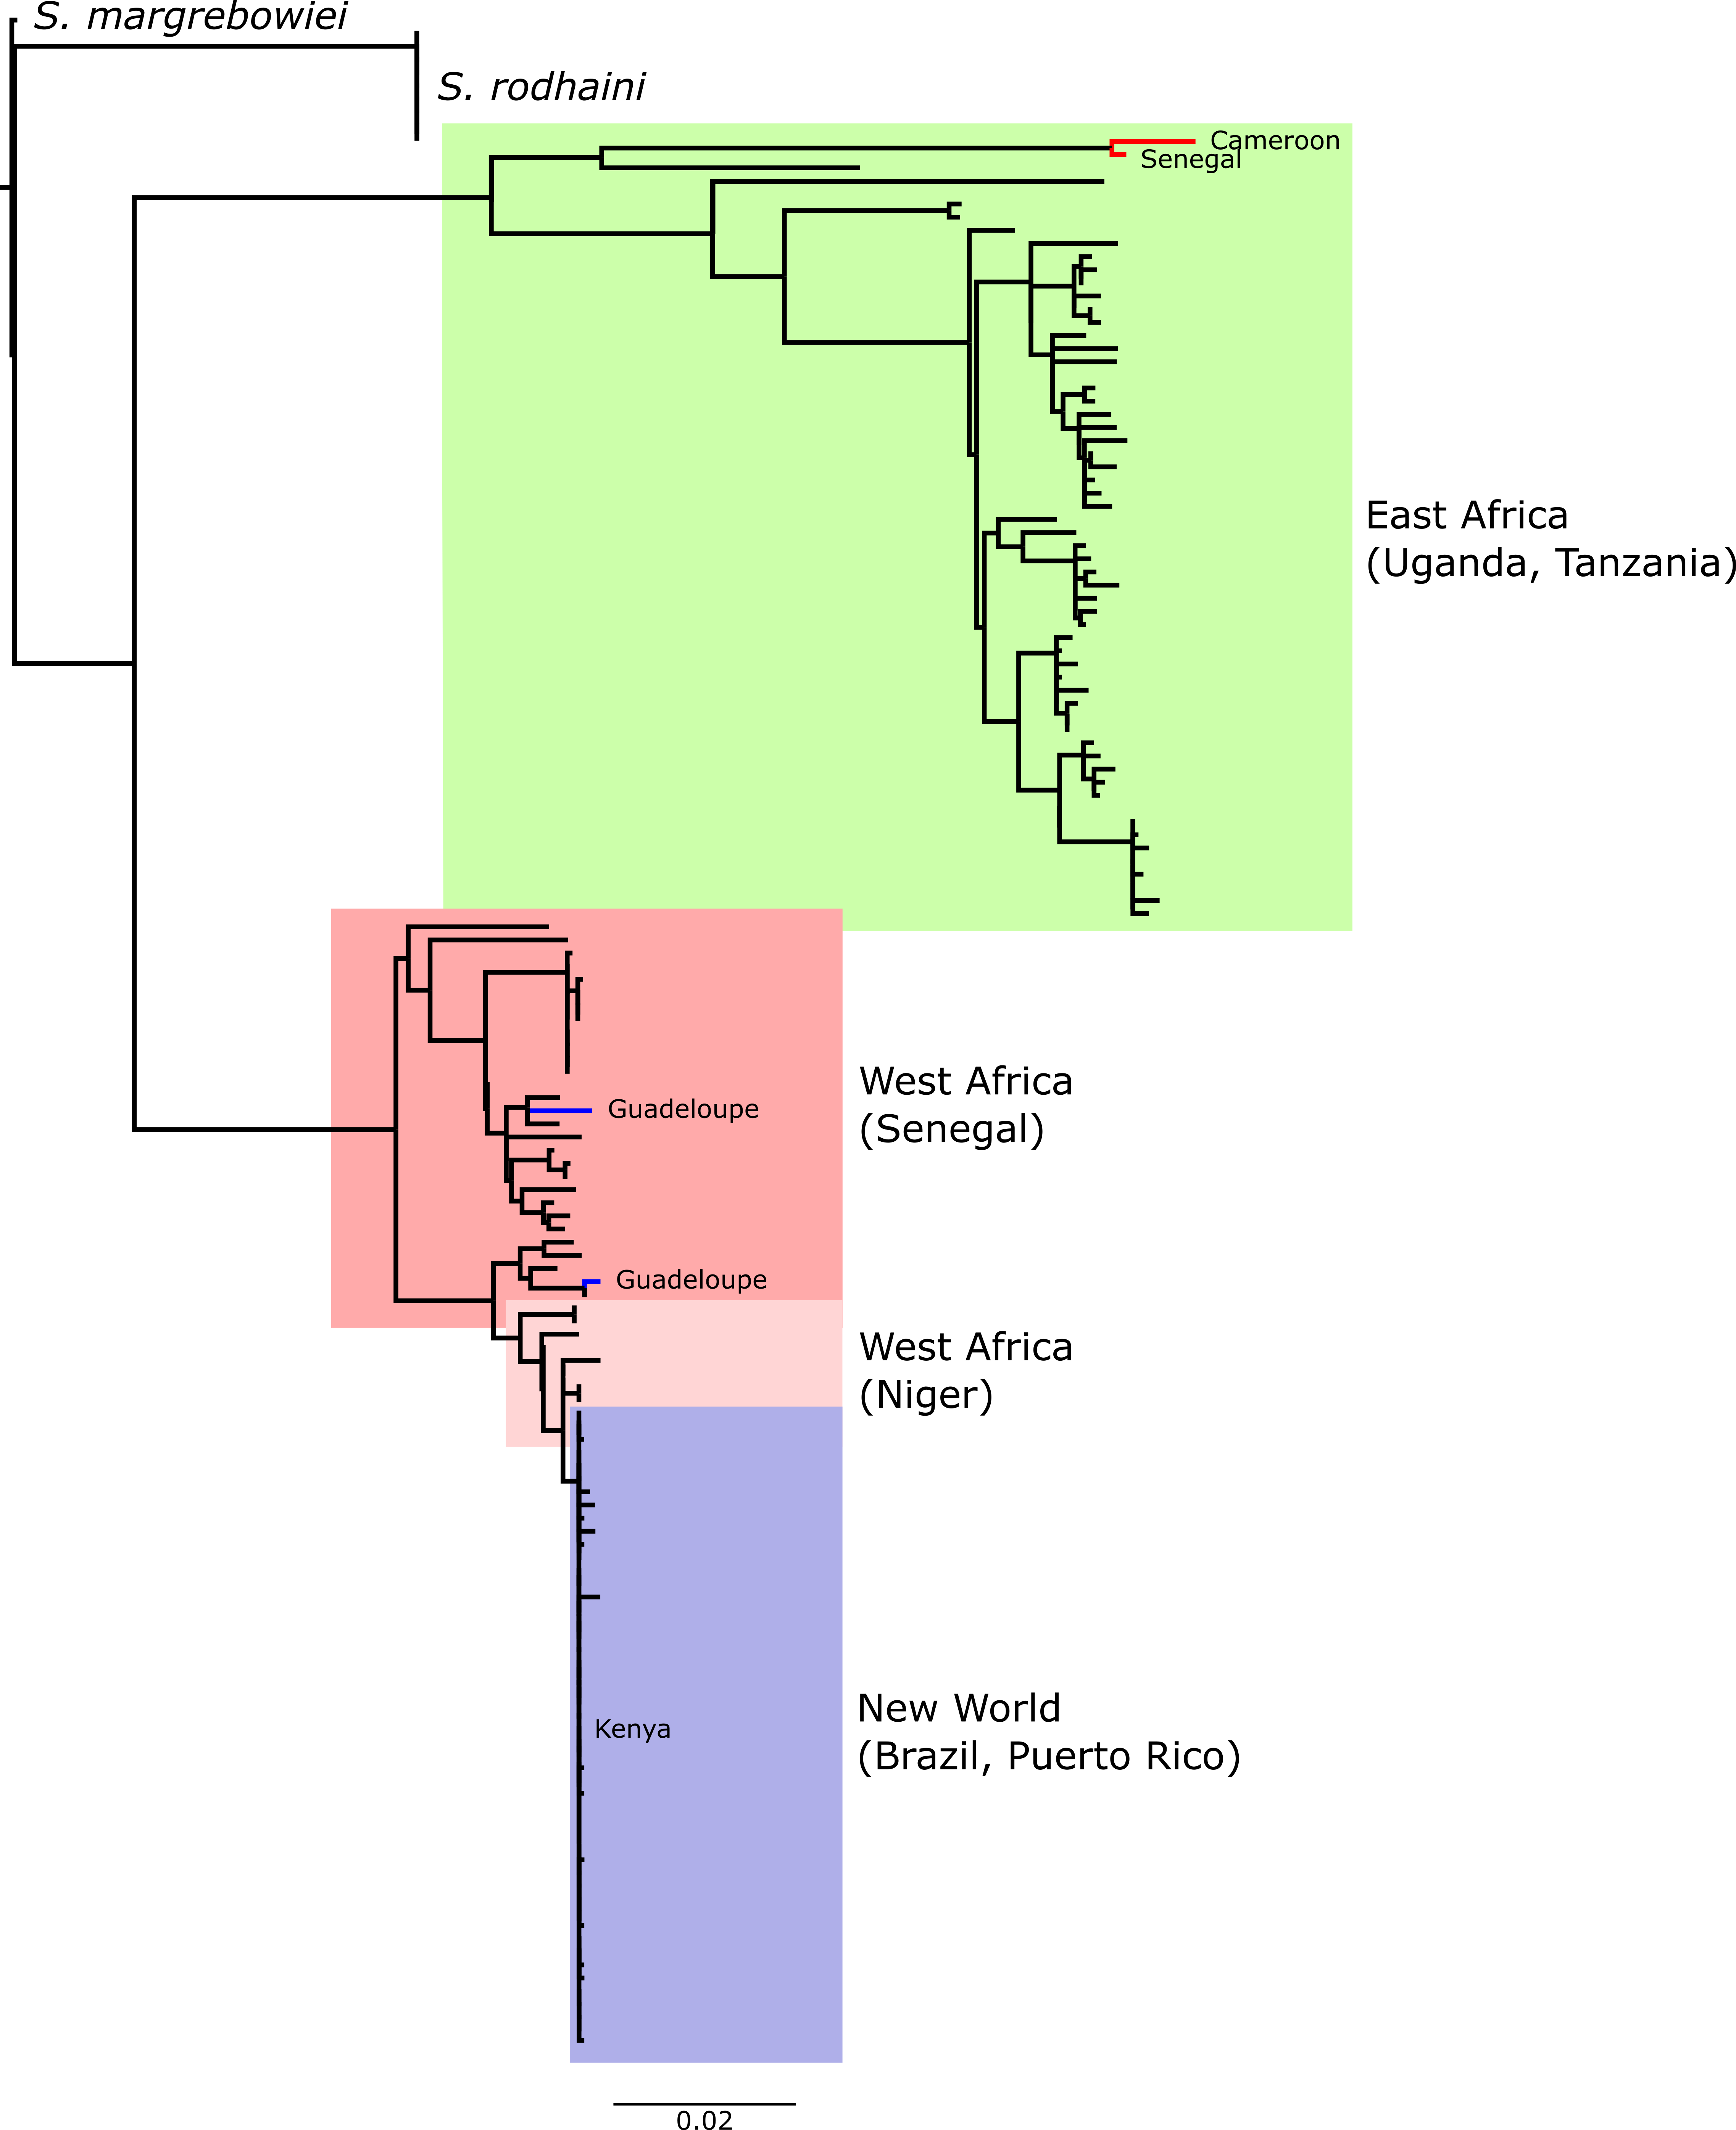

In [312]:
Image(filename="results/mito_phylo/mito_tree.png")

In [293]:
import os
from ete3 import Tree

t=Tree("results/mito_phylo/RAxML_bipartitions.smv7_ex_mito_asc-cor_informative_minus_invariants_fboot1k")

ancestor


### SFS

In [201]:
#sfs

#sfs_folded=allel.sfs_folded(pop_ac["brazil"])
#allel.plot_sfs_folded(sfs_folded)


#brazil_v_senegal_fsfs=allel.joint_sfs_folded_scaled(pop_ac["brazil"], pop_ac["west_africa"], n1=96, n2=74)
#brazil_v_niger_fsfs=allel.joint_sfs_folded(pop_ac["brazil"], pop_ac["niger"])
#brazil_v_west_africa_fsfs=allel.joint_sfs_folded(pop_ac["brazil"], pop_ac["west_africa"])

#allel.plot_joint_sfs_folded_scaled(brazil_v_senegal_fsfs)

brazil_sfs=allel.sfs_folded(pop_ac["brazil"])
west_africa_sfs=allel.sfs_folded(pop_ac["west_africa"])
senegal_sfs=allel.sfs_folded(pop_ac["senegal"])
niger_sfs=allel.sfs_folded(pop_ac["niger"])

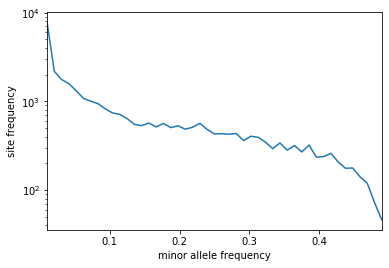

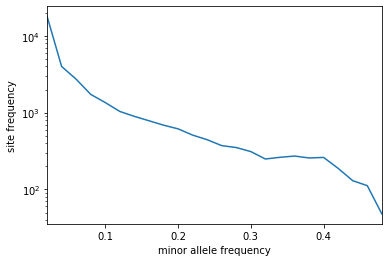

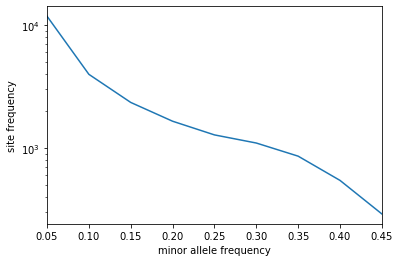

In [202]:
allel.plot_sfs_folded(brazil_sfs, n=96)
allel.plot_sfs_folded(senegal_sfs, n=50)
allel.plot_sfs_folded(niger_sfs, n=20)

### ABBA BABA

In [257]:
(d, se, z, vb, vj) = allel.average_patterson_d(pop_ac["west_africa"], 
                                               pop_ac["east_africa"], 
                                               pop_ac["rodhaini"], 
                                               pop_ac["margrebowiei"], 
                                               100)

print("D = ", d, "Z = ", z)
if d > 0 and abs(z) > 2.575: 
    print("D implies excess of ABBA sites, geneflow between B & C")
elif d < 0 and abs(z) > 2.575:
    print("D implies excess of BABA sites, geneflow between A & C")
else:
    print("no strong evidence of shared alleles (outside of ils)")

#seems to imply alleles shared with 

D =  0.04186847862782078 Z =  1.4843316182831516
no strong evidence of shared alleles (outside of ils)


### Skyline plots

In [17]:
import os
import shutil

#make a clean dir
if os.path.isdir("results/skyline"):
    shutil.rmtree("results/skyline")

os.mkdir("results/skyline")

os.mkdir("results/skyline/brazil")
os.mkdir("results/skyline/senegal")
os.mkdir("results/skyline/tanzania")
os.mkdir("results/skyline/niger")

In [18]:
import os
from os import path

skyline_pop_assignments = {
    "Sm.BR_PdV.0447.1"        : "brazil",
    "Sm.BR_PdV.1039.1"        : "brazil",
    "Sm.BR_PdV.1079.1"        : "brazil",
    "Sm.BR_PdV.1094.1"        : "brazil",
    "Sm.BR_PdV.1103.1"        : "brazil",
    "Sm.BR_PdV.1127.1"        : "brazil",
    "Sm.BR_PdV.1278.1"        : "brazil",
    "Sm.BR_PdV.1340.1"        : "brazil",
    "Sm.BR_PdV.1340.2"        : "brazil",
    "Sm.BR_PdV.1371.1"        : "brazil",
    "Sm.BR_PdV.1404.1"        : "brazil",
    "Sm.BR_PdV.1409.1"        : "brazil",
    "Sm.BR_PdV.1409_rep"      : "brazil",
    "Sm.BR_PdV.1418.1"        : "brazil",
    "Sm.BR_PdV.1475.1"        : "brazil",
    "Sm.BR_PdV.1475_rep"      : "brazil",
    "Sm.BR_PdV.1489.1"        : "brazil",
    "Sm.BR_PdV.2039.1"        : "brazil",
    "Sm.BR_PdV.2039.2"        : "brazil",
    "Sm.BR_PdV.2072.1"        : "brazil",
    "Sm.BR_PdV.2074.1"        : "brazil",
    "Sm.BR_PdV.2076.1"        : "brazil",
    "Sm.BR_PdV.2133.1"        : "brazil",
    "Sm.BR_PdV.2147.1"        : "brazil",
    "Sm.BR_PdV.2189.1"        : "brazil",
    "Sm.BR_PdV.2196.2"        : "brazil",
    "Sm.BR_PdV.2225.1"        : "brazil",
    "Sm.BR_PdV.2227.1"        : "brazil",
    "Sm.BR_PdV.2265.1"        : "brazil",
    "Sm.BR_PdV.2290.1"        : "brazil",
    "Sm.BR_PdV.2300.1"        : "brazil",
    "Sm.BR_PdV.2334.1"        : "brazil",
    "Sm.BR_PdV.2368.1"        : "brazil",
    "Sm.BR_PdV.2406.1"        : "brazil",
    "Sm.BR_PdV.2406_rep"      : "brazil",
    "Sm.BR_PdV.2422.1"        : "brazil",
    "Sm.BR_PdV.2450.1"        : "brazil",
    "Sm.BR_PdV.2456.1"        : "brazil",
    "Sm.BR_PdV.2481.1"        : "brazil",
    "Sm.BR_PdV.2489.1"        : "brazil",
    "Sm.BR_PdV.2508.1"        : "brazil",
    "Sm.BR_PdV.2516.2"        : "brazil",
    "Sm.BR_PdV.2530.1"        : "brazil",
    "Sm.BR_PdV.2538.1"        : "brazil",
    "Sm.BR_PdV.2546.1"        : "brazil",
    "Sm.BR_PdV.2556.1"        : "brazil",
    "Sm.BR_PdV.2577.1"        : "brazil",
    "Sm.BR_PdV.4293.2"        : "brazil",
    "Sm.NE_Di158.1"           : "niger",
    "Sm.NE_Di186.1"           : "niger",
    "Sm.NE_Di238.1"           : "niger",
    "Sm.NE_Di297.1"           : "niger",
    "Sm.NE_Di297.2"           : "niger",
    "Sm.NE_Di68.2"            : "niger",
    "Sm.NE_Na376.2"           : "niger",
    "Sm.NE_Na381.1"           : "niger",
    "Sm.NE_Na39.1"            : "niger",
    "Sm.NE_Na40.1"            : "niger",
    "Sm.SN_Nd103.1"           : "senegal",
    "Sm.SN_Nd109.1"           : "senegal",
    "Sm.SN_Nd114.1"           : "senegal",
    "Sm.SN_Nd115.1"           : "senegal",
    "Sm.SN_Nd18.1"            : "senegal",
    "Sm.SN_Nd22.1"            : "senegal",
    "Sm.SN_Nd24.1"            : "senegal",
    "Sm.SN_Nd25.1"            : "senegal",
    "Sm.SN_Nd34.1"            : "senegal",
    "Sm.SN_Nd43.1"            : "senegal",
    "Sm.SN_Nd47.1"            : "senegal",
    "Sm.SN_Nd5.1"             : "senegal",
    "Sm.SN_Nd5.2"             : "senegal",
    "Sm.SN_Nd50.1"            : "senegal",
    "Sm.SN_Nd54.1"            : "senegal",
    "Sm.SN_Nd56.1"            : "senegal",
    "Sm.SN_Nd77.1"            : "senegal",
    "Sm.SN_Nd79.1"            : "senegal",
    "Sm.SN_Nd9.1"             : "senegal",
    "Sm.SN_Nd90.1"            : "senegal",
    "Sm.SN_Te26.1"            : "senegal",
    "Sm.SN_Te3.1"             : "senegal",
    "Sm.SN_Te49.1"            : "senegal",
    "Sm.SN_Te55.1"            : "senegal",
    "Sm.SN_Te68.1"            : "senegal",
    "Sm.TZ_009.1.1"           : "tanzania",
    "Sm.TZ_009.10.1"          : "tanzania",
    "Sm.TZ_009.2.2"           : "tanzania",
    "Sm.TZ_009.3.1"           : "tanzania",
    "Sm.TZ_009.4.2"           : "tanzania",
    "Sm.TZ_009.5.2"           : "tanzania",
    "Sm.TZ_009.6.1"           : "tanzania",
    "Sm.TZ_009.7.1"           : "tanzania",
    "Sm.TZ_009.8.2"           : "tanzania",
    "Sm.TZ_009.9.1"           : "tanzania",
    "Sm.TZ_055.1.3"           : "tanzania",
    "Sm.TZ_055.10.1"          : "tanzania",
    "Sm.TZ_055.2.1"           : "tanzania",
    "Sm.TZ_055.3.2"           : "tanzania",
    "Sm.TZ_055.5.1"           : "tanzania",
    "Sm.TZ_055.6.1"           : "tanzania",
    "Sm.TZ_055.7.1"           : "tanzania",
    "Sm.TZ_055.8.1"           : "tanzania",
    "Sm.TZ_074N.1.2"          : "tanzania",
    "Sm.TZ_074N.10.2"         : "tanzania",
    "Sm.TZ_074N.2.2"          : "tanzania",
    "Sm.TZ_074N.3.2"          : "tanzania",
    "Sm.TZ_074N.4.1"          : "tanzania",
    "Sm.TZ_074N.6.3"          : "tanzania",
    "Sm.TZ_074N.7.2"          : "tanzania",
    "Sm.TZ_074N.8.1"          : "tanzania",
    "Sm.TZ_074N.9.1"          : "tanzania",
    "Sm.TZ_077.2.1"           : "tanzania",
    "Sm.TZ_077.3.1"           : "tanzania",
    "Sm.TZ_077.4.2"           : "tanzania",
    "Sm.TZ_077.5.1"           : "tanzania",
    "Sm.TZ_077.6.1"           : "tanzania",
    "Sm.TZ_077.7.3"           : "tanzania",
    "Sm.TZ_077.8.1"           : "tanzania",
    "Sm.TZ_077.9.2"           : "tanzania",
    "Sm.TZ_086.1.1"           : "tanzania",
    "Sm.TZ_086.2.3"           : "tanzania",
    "Sm.TZ_086.3.1"           : "tanzania",
    "Sm.TZ_086.4.2"           : "tanzania",
    "Sm.TZ_086.5.1"           : "tanzania",
    "Sm.TZ_086.6.1"           : "tanzania",
    "Sm.TZ_086.7.1"           : "tanzania",
    "Sm.TZ_086.8.1"           : "tanzania",
    "Sm.TZ_134.1.1"           : "tanzania",
    "Sm.TZ_134.2.2"           : "tanzania",
    "Sm.TZ_134.4.1"           : "tanzania",
    "Sm.TZ_134.5.1"           : "tanzania",
    "Sm.TZ_134.6.1"           : "tanzania",
    "Sm.TZ_141.1.1"           : "tanzania",
    "Sm.TZ_141.3.1"           : "tanzania",
    "Sm.TZ_141.4.2"           : "tanzania",
    "Sm.TZ_141.5.3"           : "tanzania",
    "Sm.TZ_141.6.1"           : "tanzania",
    "Sm.TZ_141.7.1"           : "tanzania",
    "Sm.TZ_141.8.1"           : "tanzania" }

#get clean files (so delete if they already exits)
for sample in skyline_pop_assignments:
    if  path.exists("results/skyline/" + skyline_pop_assignments[sample] + "/" + skyline_pop_assignments[sample] + ".list"):
        os.remove("results/skyline/" + skyline_pop_assignments[sample] + "/" + skyline_pop_assignments[sample] + ".list")
        
#create files with lists of samples per population
for sample in skyline_pop_assignments:
    with open("results/skyline/" + skyline_pop_assignments[sample] + "/" + skyline_pop_assignments[sample] + ".list", 'a') as list_file:
        list_file.write(sample + "\n")

In [19]:
%%bash

#get "loci" bed - wich are basically all the bookended baits merged together
bedtools merge \
    -d 0 \
    -i data/renamed-sma_agilent_baits.v7.0.chr_reorderd.bed \
    >results/skyline/merged_baits.bed

#get a popluation specific vcf with singletons removed and only include loci with more than 1
#  (informative) snp
for POP in brazil niger senegal tanzania; do

    #get biallelic snps for each population
    vcftools \
       --vcf results/variant_filtration/smv7_ex_autosomes.vcf \
       --keep results/skyline/$POP/$POP.list \
       --mac 2 \
       --recode \
       --recode-INFO-all \
       --stdout \
       >results/skyline/$POP/smv7_ex_autosomes_$POP.vcf

    #remove uninformative/singelton loci from each population
    vcftools \
        --vcf results/skyline/$POP/smv7_ex_autosomes_$POP.vcf \
        --singletons \
        --stdout \
        >results/skyline/$POP/smv7_ex_autosomes_singletons_$POP.tbl
        
    cut -f1,2 results/skyline/$POP/smv7_ex_autosomes_singletons_$POP.tbl \
        >results/skyline/$POP/smv7_ex_autosomes_singletons_$POP.list

    vcftools \
        --vcf results/skyline/$POP/smv7_ex_autosomes_$POP.vcf \
        --exclude-positions results/skyline/$POP/smv7_ex_autosomes_singletons_$POP.list \
        --recode \
        --recode-INFO-all \
        --stdout \
        >results/skyline/$POP/smv7_ex_autosomes_informative_$POP.vcf
   
    #find snps in 500bp regions (from baits)
    bedtools intersect \
        -c \
        -a results/skyline/merged_baits.bed \
        -b results/skyline/$POP/smv7_ex_autosomes_informative_$POP.vcf \
        > results/skyline/$POP/"$POP"_snps_per_bait.bed
    
    ##count the number of genotyped and filter for too may and too few
    cat results/skyline/$POP/"$POP"_snps_per_bait.bed \
        | awk '{ if ($4>1) print $0 }' \
            > results/skyline/$POP/"$POP"_loci_gt1_snp.bed

    #extract snps from target loci
    vcftools \
        --vcf results/skyline/$POP/smv7_ex_autosomes_informative_$POP.vcf \
        --bed results/skyline/$POP/"$POP"_loci_gt1_snp.bed \
        --recode \
        --recode-INFO-all \
        --stdout \
        >results/skyline/$POP/"$POP"_loci_gt1_snp.vcf
    
done


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf results/variant_filtration/smv7_ex_autosomes.vcf
	--keep results/skyline/brazil/brazil.list
	--recode-INFO-all
	--mac 2
	--recode
	--stdout

Keeping individuals in 'keep' list
After filtering, kept 48 out of 156 Individuals
Outputting VCF file...
After filtering, kept 25329 out of a possible 475081 Sites
Run Time = 41.00 seconds

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf results/skyline/brazil/smv7_ex_autosomes_brazil.vcf
	--singletons
	--stdout

After filtering, kept 48 out of 48 Individuals
Outputting Singleton Locations
After filtering, kept 25329 out of a possible 25329 Sites
Run Time = 1.00 seconds

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf results/skyline/brazil/smv7_ex_autosomes_brazil.vcf
	--exclude-positions results/skyline/brazil/smv7_ex_autosomes_singletons_brazil.list
	--reco

In [23]:
%%bash

#get the cox1 fragment
for POP in brazil niger senegal tanzania; do

    vcftools \
        --vcf results/variant_filtration/smv7_ex_mito.vcf \
        --keep results/skyline/$POP/$POP.list \
        --chr SM_V7_MITO \
        --from-bp 526 \
        --to-bp 886 \
        --recode \
        --recode-INFO-all \
        --stdout \
        >results/skyline/$POP/smv7_ex_cox_$POP.vcf
    
    #now combine with nuclear
    bin/gatk-4.1.2.0/gatk --java-options "-Xmx4g" \
        MergeVcfs \
            --MAX_RECORDS_IN_RAM 500000 \
            -I results/skyline/$POP/smv7_ex_cox_$POP.vcf \
            -I results/skyline/$POP/"$POP"_loci_gt1_snp.vcf \
            -O results/skyline/$POP/"$POP"_cox_auto.vcf
            
    echo -e "SM_V7_MITO\t526\t886" >>results/skyline/$POP/"$POP"_loci_gt1_snp.bed
    
done

Tool returned:
0
Tool returned:
0
Tool returned:
0
Tool returned:
0



VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf results/variant_filtration/smv7_ex_mito.vcf
	--chr SM_V7_MITO
	--to-bp 886
	--keep results/skyline/brazil/brazil.list
	--recode-INFO-all
	--recode
	--from-bp 526
	--stdout

Keeping individuals in 'keep' list
After filtering, kept 48 out of 156 Individuals
Outputting VCF file...
After filtering, kept 35 out of a possible 815 Sites
Run Time = 0.00 seconds
13:19:16.577 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/master/nplatt/sch_man_nwinvasion/bin/gatk-4.1.2.0/gatk-package-4.1.2.0-local.jar!/com/intel/gkl/native/libgkl_compression.so
[Fri Sep 20 13:19:16 CDT 2019] MergeVcfs  --INPUT results/skyline/brazil/smv7_ex_cox_brazil.vcf --INPUT results/skyline/brazil/brazil_loci_gt1_snp.vcf --OUTPUT results/skyline/brazil/brazil_cox_auto.vcf --MAX_RECORDS_IN_RAM 500000  --VERBOSITY INFO --QUIET false --VALIDATION_STRINGENCY STRICT --COMPRESSION_LEVEL 2 --CREATE_INDEX true -

In [24]:
%%bash

#make a set of population and locus specific vcfs (run on cluster to speed up)
CONDA="conda activate sch_man_nwinvasion-nbanalyses; "
QSUB="qsub -V -cwd -S /bin/bash -q all.q -j y -pe smp 1"

for POP in brazil niger senegal tanzania; do

    mkdir results/skyline/$POP/loci_vcfs
    mkdir results/skyline/$POP/logs/

    BED_FILE="results/skyline/$POP/"$POP"_loci_gt1_snp.bed"
    while read -r BED_ENTRY
    do

        CHROM=$(echo $BED_ENTRY | cut -f1 -d" ")
        START=$(echo $BED_ENTRY | cut -f2 -d" ")
        STOP=$(echo $BED_ENTRY  | cut -f3 -d" ")

        VCF_CMD="vcftools \
            --vcf results/skyline/$POP/"$POP"_cox_auto.vcf \
            --chr $CHROM \
            --from-bp $START \
            --to-bp $STOP\
            --recode \
            --recode-INFO-all \
            --stdout \
            >results/skyline/$POP/loci_vcfs/$POP"_"$CHROM"_"$START"_"$STOP.vcf"

        echo $CONDA $VCF_CMD | $QSUB -N $POP"_"$CHROM"_"$START"_"$STOP -o results/skyline/$POP/logs/$POP"_"$CHROM"_"$START"_"$STOP.vcf.log

        #dont overload the cluster        
        NUM_JOBS=$(qstat | wc -l)

        while [ $NUM_JOBS -gt 7000 ]; do
            sleep 10s
            NUM_JOBS=$(qstat | wc -l)
        done    


    done < $BED_FILE

done

Your job 5074401 ("brazil_SM_V7_1_705162_705402") has been submitted
Your job 5074402 ("brazil_SM_V7_1_1060295_1060519") has been submitted
Your job 5074403 ("brazil_SM_V7_1_1196946_1197809") has been submitted
Your job 5074404 ("brazil_SM_V7_1_1197928_1198234") has been submitted
Your job 5074405 ("brazil_SM_V7_1_1220692_1221139") has been submitted
Your job 5074406 ("brazil_SM_V7_1_1491627_1491963") has been submitted
Your job 5074407 ("brazil_SM_V7_1_1799376_1800078") has been submitted
Your job 5074408 ("brazil_SM_V7_1_1813156_1813516") has been submitted
Your job 5074409 ("brazil_SM_V7_1_1829133_1829253") has been submitted
Your job 5074410 ("brazil_SM_V7_1_1838268_1838389") has been submitted
Your job 5074411 ("brazil_SM_V7_1_2079375_2079615") has been submitted
Your job 5074412 ("brazil_SM_V7_1_2214794_2215154") has been submitted
Your job 5074413 ("brazil_SM_V7_1_2265033_2266095") has been submitted
Your job 5074414 ("brazil_SM_V7_1_2354774_2355734") has been submitted
Your job

In [ ]:
%%bash

#now that each locus has a unique vcf...physically phase the locus

#create pop specific lists of bam file
ls results/mapped_reads/Sm.BR*processed.bam >results/skyline/brazil/bams.list
ls results/mapped_reads/Sm.NE*processed.bam >results/skyline/niger/bams.list
ls results/mapped_reads/Sm.SN*processed.bam >results/skyline/senegal/bams.list
ls results/mapped_reads/Sm.TZ*processed.bam >results/skyline/tanzania/bams.list

QSUB="qsub -V -cwd -S /bin/bash -q all.q -j y -pe smp 1 "
CONDA="conda activate sch_man_nwinvasion-nbanalyses; "

#physically phase each locus
for POP in brazil niger senegal tanzania; do

    mkdir results/skyline/$POP/phased_vcfs
    BAM_LIST=$(cat results/skyline/$POP/bams.list)

    for VCF in $(ls results/skyline/$POP/loci_vcfs/*.vcf); do

        LOCUS=$(basename $VCF .vcf | cut -f2- -d"_")
        
        WHATSHAP_CMD="$CONDA whatshap phase \
            -o results/skyline/$POP/phased_vcfs/"$POP"_"$LOCUS"_phased.vcf \
            $VCF \
            $BAM_LIST"

        echo $WHATSHAP_CMD | $QSUB -N $POP"_"$LOCUS"_whatshap" -o results/skyline/$POP/logs/$POP"_"$LOCUS"_whatshap.vcf.log"

        #dont overload the cluster        
        NUM_JOBS=$(qstat | wc -l)

        while [ $NUM_JOBS -gt 7000 ]; do
            sleep 10s
            NUM_JOBS=$(qstat | wc -l)
        done    

    done 
done

In [ ]:
%%bash

#merge all phased-population-locus vcf files into a single phased vcf per population

#create pop specific lists of bam file
for POP in brazil niger senegal tanzania; do
    ls results/skyline/$POP/phased_vcfs/*.vcf \
        >results/skyline/$POP/phased_vcfs/phased_vcfs.list

    bin/gatk-4.1.2.0/gatk --java-options "-Xmx40g" \
        MergeVcfs \
            --MAX_RECORDS_IN_RAM 500000 \
            -I results/skyline/$POP/phased_vcfs/phased_vcfs.list \
            -O results/skyline/$POP/phased.vcf
done


#for POP in tanzania; do
#    for CHR in 1 2 3 4 5 6 7; do
#        ls tanzania_SM_V7_$CHR*.vcf \
#            >$CHR.list

#        ../../../../bin/gatk-4.1.2.0/gatk --java-options "-Xmx4g" \
#            MergeVcfs \
#                --MAX_RECORDS_IN_RAM 500000 \
#                -I $CHR.list \
#                -O $CHR.vcf
#    done
#done

#ls ?.vcf >chrs.list
#        ../../../../bin/gatk-4.1.2.0/gatk --java-options "-Xmx4g" \
#            MergeVcfs \
#                --MAX_RECORDS_IN_RAM 500000 \
#                -I chrs.list \
#                -O phased.vcf

In [ ]:
%%bash

#generate a phased genome and extract individual loci from them (in tab)
for POP in brazil niger tanzania senegal; do
    
    QSUB="qsub -V -cwd -S /bin/bash -q all.q -j y -pe smp 12"
    bgzip results/skyline/$POP/phased.vcf
    tabix -f results/skyline/$POP/phased.vcf.gz

    mkdir results/skyline/$POP/phased_genomes
    mkdir results/skyline/$POP/phased_loci_sequences
    mkdir results/skyline/$POP/logs
   
    ##select  random indivuals per population
    #shuf results/skyline/$POP/$POP.list | head -n 10 >results/skyline/$POP/"$POP"_random.list

    while read -r INDIV; do
        for HAP in 1 2; do
            #consensus
            CONS_CMD="$CONDA bcftools consensus \
                -H $HAP \
                -M \"?\" \
                --sample $INDIV \
                -f data/genomes/Smansoni_v7.fa \
                results/skyline/$POP/phased.vcf.gz \
                >results/skyline/$POP/phased_genomes/$INDIV"_H"$HAP.phased.fasta"

            BED_CMD="$CONDA bedtools getfasta \
                -tab \
                -fi results/skyline/$POP/phased_genomes/$INDIV"_H"$HAP.phased.fasta \
                -bed results/skyline/$POP/"$POP"_loci_gt2_lt150.bed \
                -fo results/skyline/$POP/phased_loci_sequences/$INDIV"_H"$HAP.phased.tab"

            echo $CONS_CMD | $QSUB -N $INDIV"_H"$HAP.phased -o results/skyline/$POP/logs/$INDIV"_H"$HAP.phased.log
            echo $BED_CMD  | $QSUB -N $INDIV"_H"$HAP.bed    -o results/skyline/$POP/logs/$INDIV"_H"$HAP.bed.log -hold_jid $INDIV"_H"$HAP.phased     
        done

    done <results/skyline/$POP/$POP.list
done

In [ ]:
%%bash

#convert the tab/haplotype loci into fasta for each locus (this takes a long time)

#create a fasta file for each locuas
for POP in brazil niger tanzania senegal; do
    for HAP in 1 2; do
        while read -r INDIV; do
            ##print to loci files
            awk -v header="$INDIV"_H"$HAP" -v outdir="results/skyline/$POP/phased_loci_sequences/" \
                '{print ">"header"#"$1"\n"$2 >>outdir$1".fas"}' \
                results/skyline/$POP/phased_loci_sequences/$INDIV"_H"$HAP.phased.tab
        done <results/skyline/$POP/$POP.list
    done
done

In [ ]:
%%bash

#find phylogenetically informative loci

#git clone https://github.com/marekborowiec/AMAS.git bin/

for POP in brazil niger tanzania senegal; do

    #summarize each alignment
    ./bin/amas/amas/AMAS.py summary \
        -i results/skyline/$POP/phased_loci_sequences/*.fas \
        -f fasta \
        -d dna \
        -o results/skyline/$POP/phased_loci_summary.tsv

    mkdir results/skyline/$POP/informative_phased_loci

    #if there are more than 5 informative loci and less than 500bp add to informative folder
    for PARS_INF_LOCUS in $(sed 1d results/skyline/$POP/phased_loci_summary.tsv | awk '{if ($9 > 5 && $3 < 500) print $1}'); do
        cp results/skyline/$POP/phased_loci_sequences/$PARS_INF_LOCUS \
            results/skyline/$POP/informative_phased_loci/ 
    done 
    
done

#make sure the cox sequence is in the informative loci

In [ ]:
%%bash


#now extract X random loci for 3 repliates per population
for POP in brazil niger tanzania senegal; do
    for REP in 1 2 3; do
        
        rm -r results/skyline/$POP/replicate_$REP
        mkdir results/skyline/$POP/replicate_$REP

        ##randomize list of loci 
        for FILE in $(ls results/skyline/$POP/informative_phased_loci/SM*fas | shuf | head -n 50); do
            echo $FILE >>results/skyline/$POP/replicate_$REP/locus.list

            FILE_NAME=$(basename $FILE)
            cp $FILE results/skyline/$POP/replicate_$REP/$FILE_NAME
        done
        
        
        
        ############### CP COX HERE
        
        
        
        #modify headers in each fasta file so they are for the indiviudal and conssitent across loci
        sed -i 's/\#.*//' $FILE results/skyline/$POP/replicate_$REP/*.fas

        #modify file names so that trees can be stored properly (in beast2)
        rename : - results/skyline/$POP/replicate_$REP/*.fas

        #make concatenated nexus alignment, partition, and finished files
        ./bin/amas/amas/AMAS.py concat  \
            -i results/skyline/$POP/replicate_$REP/*.fas \
            -f fasta \
            -d dna \
            --out-format nexus \
            --part-format nexus \
            --concat-part results/skyline/$POP/replicate_$REP/$POP"_rep"$REP"_partition.nexus" \
            --concat-out results/skyline/$POP/replicate_$REP/$POP"_rep"$REP"_alignment.nexus"

        cat results/skyline/$POP/replicate_$REP/$POP"_rep"$REP"_alignment.nexus" \
            results/skyline/$POP/replicate_$REP/$POP"_rep"$REP"_partition.nexus" \
            >results/skyline/$POP/replicate_$REP/$POP"_rep"$REP".nexus"
    done
done

In [ ]:
#wget -P bin/ http://hudson.cs.auckland.ac.nz/job/BEAST2/lastSuccessfulBuild/artifact/build/dist/beast.jar

#make the xml files 


#run beast
#java -jar beast.jar -working -seed 12345 -threads 1 -overwrite results/skyline/brazil/replicate_1/brazil_rep1.xml


#java -cp ./bin/beast.jar beast.app.tools.EBSPAnalyser \
#    -i results/skyline/niger/replicate_1/EBSP.log \
#    -burnin 20 \
#    -type linear \
#    -o results/skyline/niger/replicate_1/EBSP_linear_20p.tsv

### ASTRAL

In [ ]:
mkdir results/astral
mkdir results/astral/logs/

bedtools merge \
    -d 0 \
    -i data/renamed-sma_agilent_baits.v7.0.chr_reorderd.bed \
    >results/astral/merged_baits.bed


#get genomes form vcfs for each individual
#generate a genome with IUPAC
#generate a phased genome and extract individual loci from them (in tab)

#prep to generate indivudal genomes
QSUB="qsub -V -cwd -S /bin/bash -q all.q -j y -pe smp 12"
mkdir results/astral/individual_genomes
mkdir results/astral/locus_sequences

#process the vcf file
cp results/variant_filtration/smv7_ex_autosomes.vcf results/astral/

#get list of samples
grep "#" results/astral/smv7_ex_autosomes.vcf \
    | tail -n 1 \
    | cut -f10- \
    | sed 's/\t/\n/g' \
    >results/astral/samples.list

#process for bcftools
bgzip results/astral/smv7_ex_autosomes.vcf
tabix -f results/astral/smv7_ex_autosomes.vcf.gz

#for each individual generate a genome
while read -r INDIV; do
    #consensus
    CONS_CMD="$CONDA bcftools consensus \
        -M \"?\" \
        -I \
        --sample $INDIV \
        -f data/genomes/Smansoni_v7.fa \
        results/astral/smv7_ex_autosomes.vcf.gz \
        >results/astral/individual_genomes/"$INDIV".fasta"

    BED_CMD="$CONDA bedtools getfasta \
        -tab \
        -fi results/astral/individual_genomes/"$INDIV".fasta \
        -bed results/astral/merged_baits.bed \
        -fo results/astral/locus_sequences/"$INDIV".tab"

        echo $CONS_CMD | $QSUB -N "$INDIV"_phased -o results/astral/logs/"$INDIV"_phased.log
        echo $BED_CMD  | $QSUB -N "$INDIV"_bed    -o results/astral/logs/"$INDIV"_bed.log -hold_jid "$INDIV"_phased     
done <results/astral/samples.list


#create a fasta file for each locus
while read -r INDIV; do

    ##print to loci files
    awk -v header=$INDIV -v outdir="results/astral/locus_sequences/" \
        '{print ">"header"\n"$2 >>outdir$1".fas"}' \
        results/astral/locus_sequences/"$INDIV".tab

done <results/astral/samples.list

#summarize each alignment to find phylogenetically informative loci
mkdir results/astral/informative_loci


for CHR in 1 2 3 4 5 6 7; do

./bin/amas/amas/AMAS.py summary \
    -i results/astral/locus_sequences/SM_V7_$CHR*.fas \
    -f fasta \
    -d dna \
    -c 12 \
    -o results/astral/SM_V7_"$CHR"_loci_summary.tsv

done 

#create a clean loci_summary file (remove excess headers)
cp results/astral/SM_V7_1_loci_summary.tsv results/astral/loci_summary.tsv
for CHR in 2 3 4 5 6 7; do
    sed 1d results/astral/SM_V7_"$CHR"_loci_summary.tsv \
        >>results/astral/loci_summary.tsv
done 

rm results/astral/SM_V7_?_loci_summary.tsv

#copy to new dir of informative loci
for PARS_INF_LOCUS in $(sed 1d results/astral/loci_summary.tsv | awk '{if ($9 > 1) print $1}'); do
    sed 's/:/-/' results/astral/locus_sequences/$PARS_INF_LOCUS \
        >results/astral/informative_loci/$PARS_INF_LOCUS
done 

#remove ":" in all sequence headers



#now do a raxml run for each locus (fast with 100 bootstrap replicates)
mkdir results/astral/raxml_genetrees

QSUB="qsub -V -cwd -S /bin/bash -q all.q -j y -pe smp 4"
for LOCUS in $(sed 1d results/astral/loci_summary.tsv | cut -f1); do

    NO_COLON=$(echo $LOCUS | sed 's/:/-/')

    RAXML_CMD="$CONDA raxmlHPC-PTHREADS \
        -f a \
        -T 4
        -m GTRGAMMA \
        -p 12345 \
        -x 12345 \
        -# 100 \
        -s "$(pwd)"/results/astral/informative_loci/$LOCUS \
        -n $NO_COLON \
        -w "$(pwd)"/results/astral/raxml_genetrees"

        #dont overload the cluster        
        NUM_JOBS=$(qstat | wc -l)

        while [ $NUM_JOBS -gt 1200 ]; do
            sleep 10s
            NUM_JOBS=$(qstat | wc -l)
        done    
        
    echo $RAXML_CMD | $QSUB -N "$NO_COLON"_raxml -o results/astral/logs/"$NO_COLON"_raxml.log
done 

raxmlHPC -f a -m GTRGAMMA -p 12345 -x 12345 -# 1000 -s $LOCUS -n $LOCUS -w


#collapse unsupported branches


nw_luaed \
    /master/nplatt/sch_man_nwinvasion/results/astral/raxml_genetrees/RAxML_bipartitionsBranchLabels.SM_V7_1-10111508-10111868.fas \
    ’i and b < 50’ ’o()’

i & (b < 50)
#combine newick trees into single file
 cat /master/nplatt/sch_man_nwinvasion/results/astral/raxml_genetrees/RAxML_bipartitions.*.fas >results/astral/genetrees.nwk


#run astral
wget -P bin/ https://github.com/smirarab/ASTRAL/raw/master/Astral.5.6.3.zip
unzip bin/Astral.5.6.3.zip -d bin/

java -jar bin/Astral/astral.5.6.3.jar \
    -i results/astral/genetrees.nwk \
    -o results/astral/astral.nwk \
    2>results/astral/astral.log